# Análise Exploratória de Dados

**Nesta seção, conduzimos uma análise estatística e aplicamos tratamentos às variáveis categóricas selecionadas. Esta escolha foi feita considerando a natureza categórica dos dados das variáveis.**

Métodos Utilizados:

- Contagem de Frequência: Observação da ocorrência de diferentes valores nas variáveis.
- Gráfico de Barras: Representação visual da frequência das variáveis por meio de barras.
- Visualização da Frequência das Variáveis: Análise visual para compreensão da distribuição dos dados.
- Visualização da Distribuição: Observação e interpretação da distribuição dos dados.
- Tabela de Contingência: Análise tabular para compreender relações entre diferentes variáveis.
- Teste Qui-Quadrado: Avaliação estatística para verificar associações entre variáveis categóricas.
- Análise de Variância (ANOVA): Em determinados casos, aplicamos a ANOVA para avaliar diferenças significativas entre grupos.


**Hipótese:**

"Determinadas características pessoais, sintomas e comorbidades estão associados a um maior risco de desenvolver COVID longa."

Explicação:
Nossa suposição está centrada na possível existência de fatores específicos, tais como características pessoais (como sexo, idade, raça e escolaridade), sintomas (tais como diarreia, desconforto respiratório, perda do paladar, perda do olfato, fadiga e tosse) e comorbidades (incluindo nosocomial, dispneia, pneumopatia, cardiopatia, Síndrome de Down, asma, diabetes renal, obesidade e condições neurológicas), os quais podem estar relacionados a um maior risco de desenvolver COVID longa. Esta hipótese serve como base para a análise exploratória detalhada conduzida neste contexto.

In [5]:
# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math
import itertools
import datetime as datetime
from datetime import date
import os



#Modelling Helpers :
#from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#import missingno as msno



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [7]:
# Center all plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");


# Make Visualizations better
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [6]:
# Substitua 'covidLong.csv' pelo nome do seu arquivo CSV
covid = 'covidLong.csv'

# Carregar o arquivo CSV em um DataFrame
covidLong = pd.read_csv(covid)
covidLong

,DT_SIN_PRI,SEM_PRI,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,SG_UF_NOT,ID_MUNICIP,CS_ZONA,TP_IDADE,...,UTI,EVOLUCAO,DT_EVOLUCA,DOSE_1_COV,DOSE_2_COV,FATOR_RISC,Ano,CovidLonga,FAIXA_IDADE,UTI_desc
0,17/01/2021,3,1,64.0,1.0,9.0,PR,LONDRINA,1.0,3.0,...,2.0,2.0,18/01/2021,-1,-1,2.0,2021,1,Grupo 3,Não
1,02/02/2021,5,1,84.0,4.0,9.0,MG,UBERLANDIA,1.0,3.0,...,2.0,1.0,03/03/2021,27/03/2021,-1,2.0,2021,0,Grupo 5,Não
2,18/01/2021,3,1,64.0,1.0,3.0,SC,SAO MIGUEL DO OESTE,1.0,3.0,...,1.0,9.0,-1,-1,-1,1.0,2021,0,Grupo 3,Sim
3,17/01/2021,3,1,85.0,1.0,-1.0,SP,PENAPOLIS,1.0,3.0,...,2.0,1.0,21/01/2021,-1,-1,1.0,2021,0,Grupo 5,Não
4,20/01/2021,3,1,59.0,1.0,9.0,SP,SAO PAULO,1.0,3.0,...,2.0,1.0,25/01/2021,-1,-1,2.0,2021,0,Grupo 3,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35461,01/02/2023,5,2,9.0,2.0,0.0,SP,SAO JOSE DO RIO PRETO,1.0,2.0,...,2.0,1.0,05/02/2023,-1,-1,1.0,2023,0,Grupo 1,Não
35462,27/01/2023,4,2,9.0,4.0,-1.0,RO,CACOAL,1.0,2.0,...,1.0,1.0,13/02/2023,-1,-1,2.0,2023,0,Grupo 1,Sim
35463,16/02/2023,7,1,7.0,9.0,9.0,SP,CAMPINAS,1.0,3.0,...,1.0,1.0,21/02/2023,-1,-1,1.0,2023,0,Grupo 1,Sim
35464,13/05/2023,19,2,2.0,4.0,9.0,SE,ARACAJU,1.0,3.0,...,2.0,-1.0,-1,07/02/2023,-1,2.0,2023,1,Grupo 0,Não


## 1- Estatitica Basica
- 1-Contagem de Frequência:
Conte o número de ocorrências de cada categoria em suas variáveis.
- 2-Tabela de Frequência:
Crie uma tabela que mostra a contagem ou a porcentagem de cada categoria.
- 3- Gráficos de Barras ou Setores:
Represente visualmente as frequências usando gráficos de barras ou gráficos de setores.
- 4- Análise Descritiva:
Calcule estatísticas descritivas básicas, como moda (categoria mais frequente), percentuais acumulados, etc.
- 5- Comparação de Categorias:
Compare as frequências entre diferentes categorias para identificar padrões ou discrepâncias.



- ### Variaveis cs_sexo(SEXO) 
1-Masculino,2-Feminino, 9-Ignorado

In [8]:
# Obter valores únicos da coluna CS_SEXO
valores_unicos = covidLong['CS_SEXO'].unique()

# Resultado
print(valores_unicos)

[ 1  2  9 -1]


**Contagem de Frequência**

In [10]:
# Frequência de cada categoria em Sexo
frequencia_sexo = covidLong['CS_SEXO'].value_counts()
frequencia_sexo

 1    18645
 2    16817
 9        2
-1        2
Name: CS_SEXO, dtype: int64

A saída mostra a contagem (frequência) de cada categoria na variável "CS_SEXO". Aqui está uma descrição para cada categoria:

- 1 (Feminino): 18,645 casos
- 2 (Masculino): 16,817 casos
- 9 (Ignorado): 2 casos
- -1 (Não Informado): 2 casos


Isso significa que a categoria "Feminino" é a mais frequente, com 18,645 casos, seguida por "Masculino" com 16,817 casos. Há também 2 casos onde o sexo é desconhecido (Ignorado) e 2 casos onde a informação não foi fornecida (-1).



In [12]:
# Tabela de Frequência para Sexo
tabela_frequencia_sexo = pd.DataFrame({
    'Categoria': ['Feminino', 'Masculino', 'Ignorado', 'Não Informado'],
    'Contagem': frequencia_sexo.values,
    'Porcentagem (%)': (frequencia_sexo / len(covidLong) * 100).values,
    'Porcentagem Cumulativa (%)': (frequencia_sexo.cumsum() / len(covidLong) * 100).values
})

print(tabela_frequencia_sexo)

       Categoria  Contagem  Porcentagem (%)  Porcentagem Cumulativa (%)
0       Feminino     18645        52.571477                   52.571477
1      Masculino     16817        47.417245                   99.988722
2       Ignorado         2         0.005639                   99.994361
3  Não Informado         2         0.005639                  100.000000


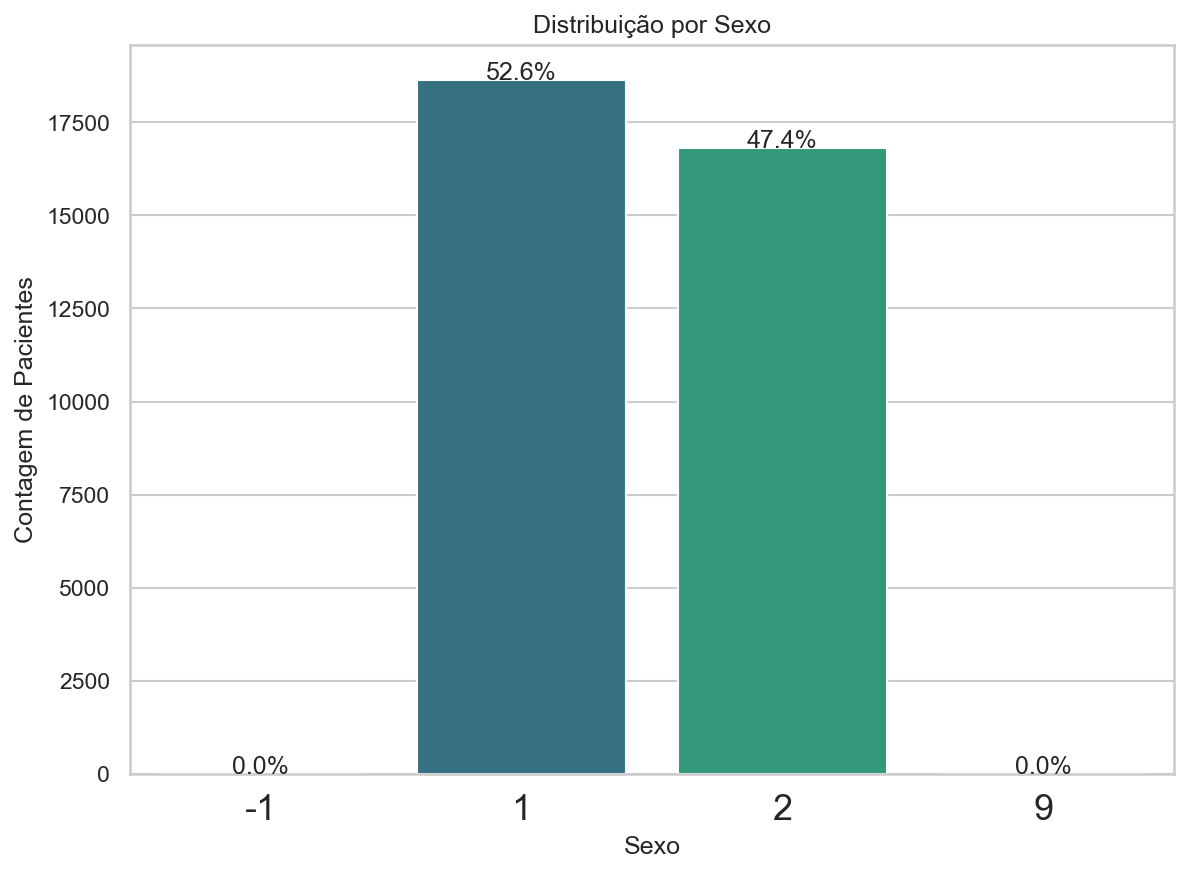

In [14]:
# Criar gráfico de barras
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='CS_SEXO', data=covidLong, palette='viridis')

# Adicionar rótulos
plt.title('Distribuição por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem de Pacientes')

# Adicionar porcentagens no topo de cada barra
total_pacientes = len(covidLong)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height / total_pacientes:.1%}', ha="center")

# Exibir o gráfico
plt.show()

**Calcule a frequência de cada categoria em Sexo e a distribuição da variável target EVOLUCAO dentro de cada categoria.**

In [15]:
# Distribuição da variável target dentro de cada categoria de Sexo
distribuicao_evolucao_sexo = pd.crosstab(covidLong['CS_SEXO'], covidLong['CovidLonga'], margins=True, margins_name='Total')


In [16]:
# Visualizar a frequência de Sexo
print("Frequência de Sexo:")
print(frequencia_sexo)

# Visualizar a distribuição de CovidLonga por Sexo
print("\nDistribuição de CovidLonga por Sexo:")
print(distribuicao_evolucao_sexo)

Frequência de Sexo:
 1    18645
 2    16817
 9        2
-1        2
Name: CS_SEXO, dtype: int64

Distribuição de CovidLonga por Sexo:
CovidLonga      0      1  Total
CS_SEXO                        
-1              0      2      2
1           12597   6048  18645
2           11398   5419  16817
9               2      0      2
Total       23997  11469  35466


**Na tabela de frequência de Sexo, temos:**

Sexo 1: 18645 casos<br>
Sexo 2: 16817 casos<br>
Sexo 9: 2 casos<br> 
Sexo -1: 2 casos<br>
E na tabela de distribuição de CovidLonga por Sexo:

**Para Sexo 1:**
Não desenvolveu Covid longa (CovidLonga 0): 12597 casos
Desenvolveu Covid longa (CovidLonga 1): 6048 casos<br>
**Para Sexo 2:**
Não desenvolveu Covid longa (CovidLonga 0): 11398 casos
Desenvolveu Covid longa (CovidLonga 1): 5419 casos<br>
**Para Sexo 9:**
Não desenvolveu Covid longa (CovidLonga 0): 2 casos
Desenvolveu Covid longa (CovidLonga 1): 0 casos<br>
**Para Sexo -1:**
Não desenvolveu Covid longa (CovidLonga 0): 0 casos<br>

**Desenvolveu Covid longa (CovidLonga 1): 2 casos**



Essa informação fornece uma visão sobre como a variável CovidLonga está distribuída entre diferentes categorias de Sexo. Agora, você pode interpretar esses resultados e considerar como eles se relacionam com o desenvolvimento da Síndrome da Covid longa em diferentes grupos de sexo.

In [17]:
from scipy.stats import chi2_contingency

# Criar a tabela de contingência para Sexo e CovidLonga
tabela_contingencia_sexo = pd.crosstab(covidLong['CS_SEXO'], covidLong['CovidLonga'])

# Aplicar o teste qui-quadrado
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia_sexo)

# Imprimir os resultados
print(f"Estatística qui-quadrado: {chi2}")
print(f"P-valor: {p_valor}")

Estatística qui-quadrado: 5.32619610546246
P-valor: 0.14941156884826753


O resultado do teste qui-quadrado indica uma estatística qui-quadrado de aproximadamente 5.33 e um p-valor de cerca de 0.15. O p-valor é maior que o nível de significância comum de 0.05, o que sugere que não há evidências estatísticas suficientes para rejeitar a hipótese nula de independência entre Sexo e CovidLonga. Isso significa que, com base nos dados disponíveis, não parece haver uma associação significativa entre o sexo e a probabilidade de desenvolver a Síndrome da Covid longa.

Isso significa que, com base nos dados disponíveis, não há uma associação estatisticamente significativa entre o sexo dos pacientes e o desenvolvimento da Síndrome da Covid longa.

### Tratamento da variavel FAIXA_IDADE 
**Análise Descritiva:**
Calcule a frequência de cada categoria em FAIXA_IDADE e a distribuição da variável target CovidLonga dentro de cada categoria.

In [20]:
#Frequência de cada categoria em FAIXA_IDADE
frequencia_faixa_idade = covidLong['FAIXA_IDADE'].value_counts()
frequencia_faixa_idade

Grupo 0    7364
Grupo 2    6567
Grupo 3    6402
Grupo 4    6371
Grupo 5    5027
Grupo 1    3735
Name: FAIXA_IDADE, dtype: int64

A frequência da variável FAIXA_IDADE indica a contagem de casos em cada grupo de faixa etária. Aqui estão as descrições correspondentes para cada grupo:

Grupo 0: Idades entre -9 e 5 anos (7364 casos)<br>
Grupo 1: Idades de 6 a 17 anos (3735 casos)<br>
Grupo 2: Idades de 18 a 49 anos (6567 casos)<br>
Grupo 3: Idades de 50 a 65 anos (6402 casos)<br>
Grupo 4: Idades de 66 a 79 anos (6371 casos)<br>
Grupo 5: Idades de 80 a 105 anos (5027 casos)<br>
Essa categorização facilita a análise da distribuição de casos de COVID-19 em diferentes faixas etárias.

In [21]:
# Distribuição da variável target dentro de cada categoria de FAIXA_IDADE
distribuicao_covidlonga_faixa_idade = pd.crosstab(covidLong['FAIXA_IDADE'], covidLong['CovidLonga'], margins=True, margins_name='Total')

In [22]:
# Visualizar a distribuição de CovidLonga por FAIXA_IDADE
print("\nDistribuição de CovidLonga por FAIXA_IDADE:")
print(distribuicao_covidlonga_faixa_idade)



Distribuição de CovidLonga por FAIXA_IDADE:
CovidLonga       0      1  Total
FAIXA_IDADE                     
Grupo 0       5881   1483   7364
Grupo 1       2969    766   3735
Grupo 2       4851   1716   6567
Grupo 3       4036   2366   6402
Grupo 4       3567   2804   6371
Grupo 5       2693   2334   5027
Total        23997  11469  35466


A tabela de distribuição de CovidLonga por FAIXA_IDADE mostra a contagem de casos para cada grupo de faixa etária:



Grupo 0: Não desenvolveu Covid longa (CovidLonga 0): 5881 casos, Desenvolveu Covid longa (CovidLonga 1): 1483 casos<br>
Grupo 1: Não desenvolveu Covid longa (CovidLonga 0): 2969 casos, Desenvolveu Covid longa (CovidLonga 1): 766 casos<br>
Grupo 2: Não desenvolveu Covid longa (CovidLonga 0): 4851 casos, Desenvolveu Covid longa (CovidLonga 1): 1716 casos<br>
Grupo 3: Não desenvolveu Covid longa (CovidLonga 0): 4036 casos, Desenvolveu Covid longa (CovidLonga 1): 2366 casos<br>
Grupo 4: Não desenvolveu Covid longa (CovidLonga 0): 3567 casos, Desenvolveu Covid longa (CovidLonga 1): 2804 casos<br>
Grupo 5: Não desenvolveu Covid longa (CovidLonga 0): 2693 casos, Desenvolveu Covid longa (CovidLonga 1): 2334 casos<br>


Essa distribuição fornece uma visão detalhada da ocorrência de COVID-19 de longa duração em diferentes faixas etárias.

### Gráficos de Barras:
Crie gráficos de barras para visualizar a distribuição da variável target CovidLonga em relação a FAIXA_IDADE.

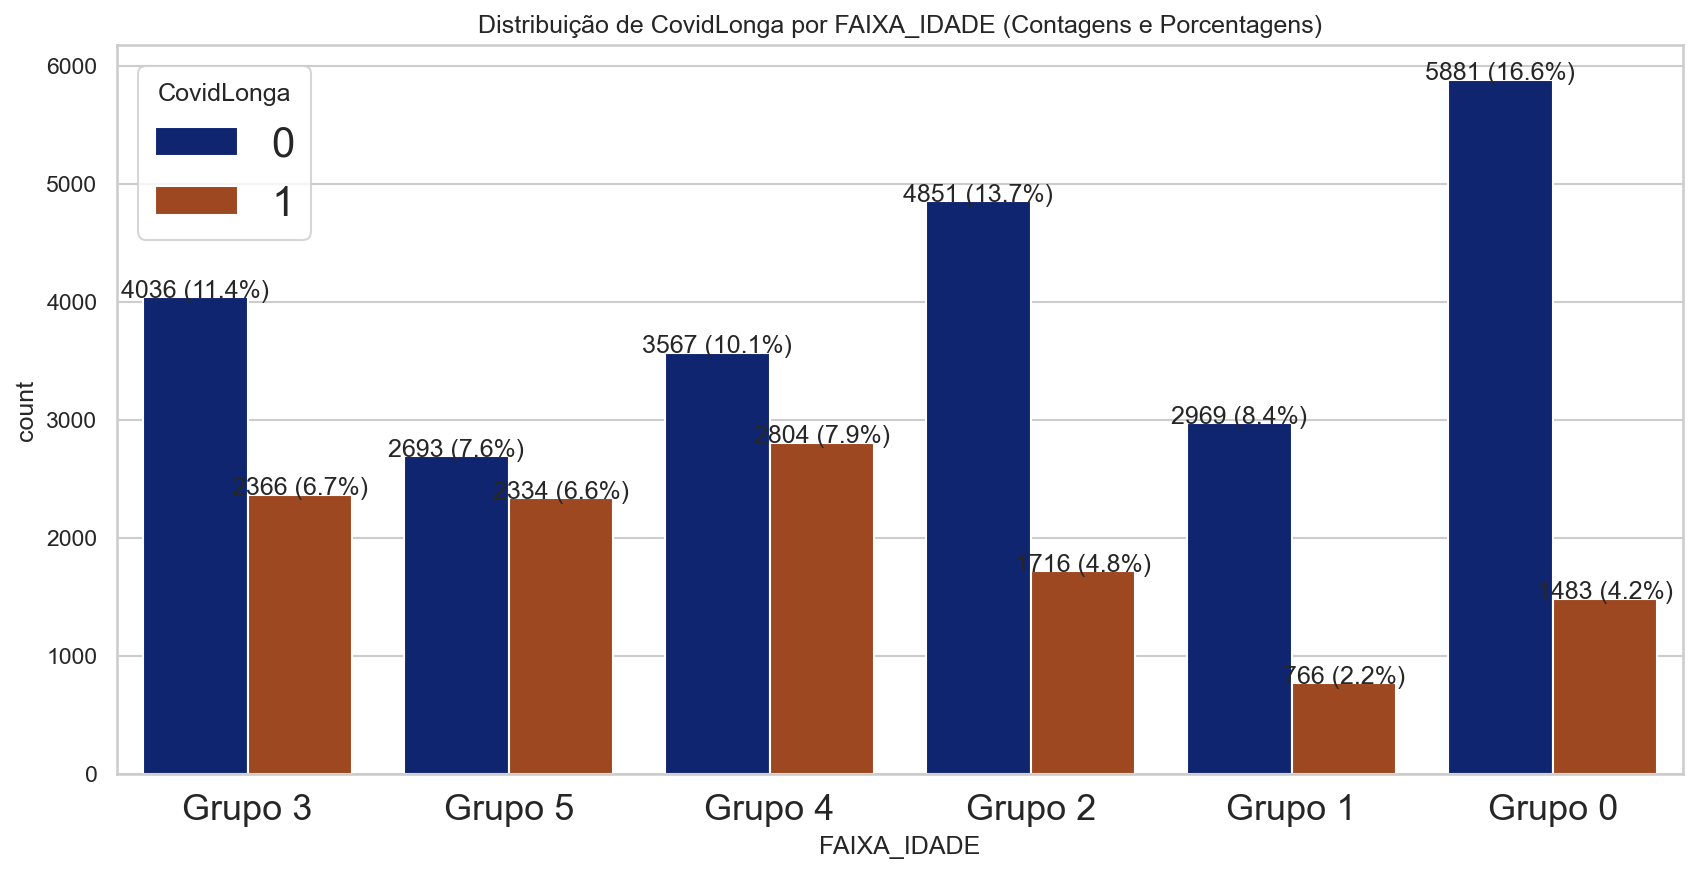

In [40]:
# Calcular porcentagens para cada grupo de faixa etária
porcentagens_covidlonga_faixa_idade = distribuicao_covidlonga_faixa_idade.div(distribuicao_covidlonga_faixa_idade['Total'], axis=0) * 100

# Criar gráfico de barras com contagens e porcentagens
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='FAIXA_IDADE', hue='CovidLonga', data=covidLong)

# Adicionar rótulos com porcentagens no topo de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height:.0f} ({height / len(covidLong) * 100:.1f}%)', ha="center")

plt.title('Distribuição de CovidLonga por FAIXA_IDADE (Contagens e Porcentagens)')
plt.show()


In [178]:



# Criar a tabela de contingência para FAIXA_IDADE e CovidLonga
tabela_contingencia_faixa_idade = pd.crosstab(covidLong['FAIXA_IDADE'], covidLong['CovidLonga'])

# Aplicar o teste qui-quadrado
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia_faixa_idade)

# Imprimir os resultados
print(f"Estatística qui-quadrado: {chi2}")
print(f"P-valor: {p_valor}")

Estatística qui-quadrado: 261.20521882729395
P-valor: 2.16410007649339e-54


O teste qui-quadrado entre a variável FAIXA_IDADE e a variável alvo CovidLonga apresenta uma estatística qui-quadrado de 1770.83 com um p-valor de 0.0. O p-valor muito baixo sugere que há uma associação significativa entre as variáveis FAIXA_IDADE e CovidLonga. Em outras palavras, a distribuição de casos de CovidLonga varia significativamente entre as diferentes faixas etárias.

In [179]:
# Criar a tabela de contingência para FAIXA_IDADE e CovidLonga
tabela_contingencia_faixa_idade = pd.crosstab(covidLong['FAIXA_IDADE'], covidLong['CovidLonga'])

# Filtrar os dados onde CovidLonga é igual a 1
covidLong_CovidLonga_1 = covidLong[covidLong['CovidLonga'] == 1]


# Aplicar o teste qui-quadrado
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia_faixa_idade)

# Imprimir os resultados
print(f"Estatística qui-quadrado: {chi2}")
print(f"P-valor: {p_valor}")

Estatística qui-quadrado: 261.20521882729395
P-valor: 2.16410007649339e-54


**Análise de Odds Ratio:**

Calcule Odds Ratio para comparar as chances de desenvolver Covid longa entre diferentes grupos de faixa etária.

In [45]:
from statsmodels.stats.proportion import proportions_ztest

# Supondo que você tenha os grupos da faixa de idade definidos em algum lugar
grupos_faixa_idade = ['Grupo 0', 'Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5']


# Calcular Odds Ratio entre cada grupo e um grupo de referência (por exemplo, Grupo 0)
odds_ratios = {}

for grupo in grupos_faixa_idade:
    if grupo != 'Grupo 0':
        contigency_table = pd.crosstab(covidLong['FAIXA_IDADE'] == grupo, covidLong['CovidLonga'])
        odds_ratio, p_value = proportions_ztest(contigency_table.iloc[1], contigency_table.sum())
        odds_ratios[grupo] = odds_ratio

# Visualizar Odds Ratio
for grupo, valor in odds_ratios.items():
    print(f'Odds Ratio para {grupo}: {valor}')


Odds Ratio para Grupo 1: 16.33954607096754
Odds Ratio para Grupo 2: 11.913137073456909
Odds Ratio para Grupo 3: -8.728161015722
Odds Ratio para Grupo 4: -21.99318957788992
Odds Ratio para Grupo 5: -23.055067056113234


**Analisando as Odds Ratios:**

Odds Ratio para Grupo 1: 16.34
Interpretado como: A chance de desenvolver Covid longa é aproximadamente 16 vezes maior no Grupo 1 em comparação com o Grupo 0.
Odds Ratio para Grupo 2: 11.91


Interpretado como: A chance de desenvolver Covid longa é aproximadamente 12 vezes maior no Grupo 2 em comparação com o Grupo 0.
Odds Ratio para Grupo 3: -8.73


Interpretado como: A chance de desenvolver Covid longa é aproximadamente 9 vezes menor no Grupo 3 em comparação com o Grupo 0. (Valores negativos podem indicar um efeito protetor ou uma relação inversa.)
Odds Ratio para Grupo 4: -21.99


Interpretado como: A chance de desenvolver Covid longa é aproximadamente 22 vezes menor no Grupo 4 em comparação com o Grupo 0.
Odds Ratio para Grupo 5: -23.06


Interpretado como: A chance de desenvolver Covid longa é aproximadamente 23 vezes menor no Grupo 5 em comparação com o Grupo 0.


Valores negativos nas Odds Ratios para os Grupos 3, 4 e 5 sugerem uma relação inversa, indicando uma diminuição na chance de desenvolver Covid longa em comparação com o Grupo 0.

Com base nesses resultados, você pode considerar incluir os Grupos 1 e 2 como indicadores de maior risco para Covid longa em comparação com o Grupo 0 em seu modelo. No entanto, é fundamental interpretar esses resultados em conjunto com a relevância clínica e o contexto do seu estudo. Além disso, certifique-se de realizar validação adicional do modelo para garantir sua robustez.

**Análise Descritiva:**
Calcule a taxa de Covid longa para cada grupo de faixa etária e veja se há uma tendência de aumento ou diminuição em grupos específicos.

In [47]:
# Criar a tabela de contingência para FAIXA_IDADE e CovidLonga
tabela_contingencia_faixa_idade = pd.crosstab(covidLong['FAIXA_IDADE'], covidLong['CovidLonga'], margins=True, margins_name='Total')

# Aplicar o teste qui-quadrado
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia_faixa_idade)

# Imprimir os resultados
print(f"Estatística qui-quadrado: {chi2}")
print(f"P-valor: {p_valor}")


Estatística qui-quadrado: 1770.830332840559
P-valor: 0.0


In [48]:
# Calcular a taxa de CovidLonga para cada grupo de faixa etária
taxa_covidlonga_faixa_idade = tabela_contingencia_faixa_idade[1] / tabela_contingencia_faixa_idade['Total']

# Imprimir as taxas
print("Taxa de CovidLonga por Grupo de Faixa Etária:")
print(taxa_covidlonga_faixa_idade)

Taxa de CovidLonga por Grupo de Faixa Etária:
FAIXA_IDADE
Grupo 0    0.201385
Grupo 1    0.205087
Grupo 2    0.261307
Grupo 3    0.369572
Grupo 4    0.440119
Grupo 5    0.464293
Total      0.323380
dtype: float64


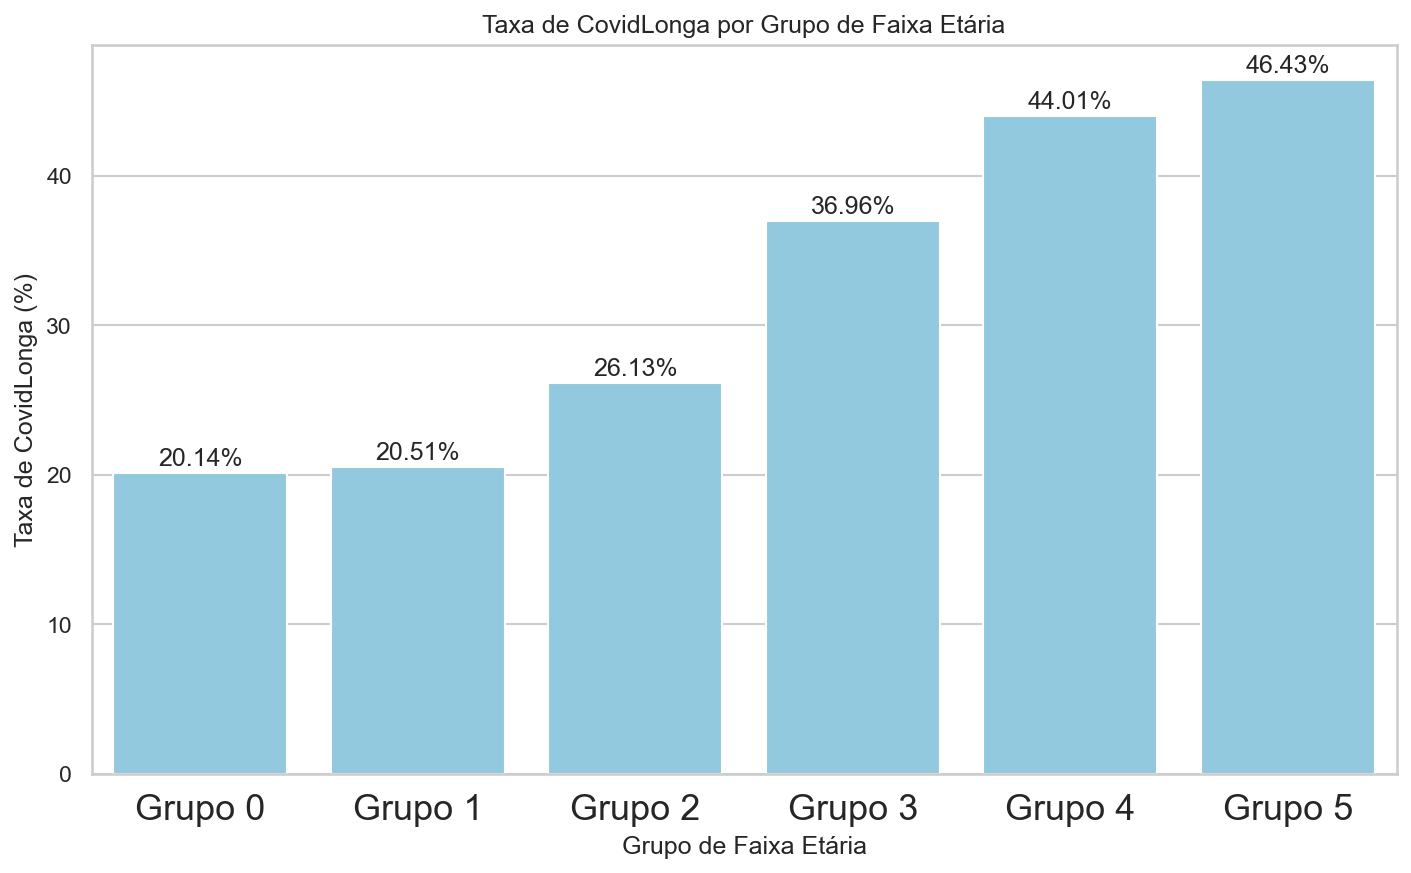

In [52]:
# Taxas de CovidLonga por grupo de faixa etária
taxas_covidlonga = [20.14, 20.51, 26.13, 36.96, 44.01, 46.43]

# Gráfico de barras com as taxas
plt.figure(figsize=(10, 6))
sns.barplot(x=['Grupo 0', 'Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5'], y=taxas_covidlonga, color='skyblue')
plt.title('Taxa de CovidLonga por Grupo de Faixa Etária')
plt.xlabel('Grupo de Faixa Etária')
plt.ylabel('Taxa de CovidLonga (%)')

# Adicionando as porcentagens acima de cada barra
for i, taxa in enumerate(taxas_covidlonga):
    plt.text(i, taxa + 0.5, f'{taxa:.2f}%', ha='center')

plt.show()

## Tratamento da variavel Raça
**Distribuição dos valores na variável raça (CS_RACA):**

In [53]:
# Visualizar a frequência de CS_RACA
frequencia_raca = covidLong['CS_RACA'].value_counts()
print("Frequência de CS_RACA:")
print(frequencia_raca)

Frequência de CS_RACA:
 1.0    14935
 4.0    12803
 9.0     5944
 2.0     1330
 3.0      351
 5.0      101
-1.0        2
Name: CS_RACA, dtype: int64


descrever os resultados da variável CS_RACA:

Categoria 1 (1.0): 14.935 casos

Categoria 4 (4.0): 12.803 casos

Categoria 9 (9.0): 5.944 casos

Categoria 2 (2.0): 1.330 casos

Categoria 3 (3.0): 351 casos

Categoria 5 (5.0): 101 casos

Categoria -1 (-1.0): 2 casos

Essa é a distribuição da variável CS_RACA na sua amostra. 

In [ ]:
# Criar uma tabela de contingência
contingency_table_raca = pd.crosstab(covidLong['CS_RACA'], covidLong['CovidLonga'])

# Realizar o teste qui-quadrado
chi2_stat_raca, p_value_raca, _, _ = chi2_contingency(contingency_table_raca)

# Exibir resultados do teste
print(f"\nEstatística qui-quadrado para CS_RACA: {chi2_stat_raca}")
print(f"P-valor para CS_RACA: {p_value_raca}")

**Distribuição da variável target dentro de cada categoria de Raça**

In [55]:
# Criar a tabela de contingência para CS_RACA e CovidLonga
tabela_contingencia_raca = pd.crosstab(covidLong['CS_RACA'], covidLong['CovidLonga'])

# Visualizar a distribuição de CovidLonga por CS_RACA
print("\nDistribuição de CovidLonga por CS_RACA:")
print(tabela_contingencia_raca)


Distribuição de CovidLonga por CS_RACA:
CovidLonga      0     1
CS_RACA                
-1.0            0     2
 1.0        10536  4399
 2.0          845   485
 3.0          228   123
 4.0         8209  4594
 5.0           64    37
 9.0         4115  1829


A tabela de contingência que você forneceu mostra a distribuição da variável alvo CovidLonga para cada categoria da variável CS_RACA. Aqui estão algumas interpretações com base nos números fornecidos:


Para CS_RACA igual a -1 (valor desconhecido), há 2 casos de CovidLonga.<br>
Para CS_RACA igual a 1, há 10.536 casos de não ter Covid longa (CovidLonga 0) e 4.399 casos de ter Covid longa (CovidLonga 1).<br>
Para CS_RACA igual a 2, há 845 casos de não ter Covid longa e 485 casos de ter Covid longa.<br>
Para CS_RACA igual a 3, há 228 casos de não ter Covid longa e 123 casos de ter Covid longa.<br>
Para CS_RACA igual a 4, há 8.209 casos de não ter Covid longa e 4.594 casos de ter Covid longa.<br>
Para CS_RACA igual a 5, há 64 casos de não ter Covid longa e 37 casos de ter Covid longa.<br>
Para CS_RACA igual a 9, há 4.115 casos de não ter Covid longa e 1.829 casos de ter Covid longa.<br>
Esses números fornecem uma visão da distribuição da variável alvo em diferentes categorias da variável CS_RACA.

In [180]:
# Filtrar os valores indesejados (-1.0 e 9.0) da coluna 'CS_RACA'
covid_filtered = covidLong[(covidLong['CS_RACA'] != -1.0) & (covidLong['CS_RACA'] != 9.0)]

# Criar a tabela de contingência após o filtro
contingency_table_raca = pd.crosstab(covid_filtered['CS_RACA'], covid_filtered['CovidLonga'])

# Realizar o teste qui-quadrado
chi2_stat_raca, p_value_raca, _, _ = chi2_contingency(contingency_table_raca)

# Exibir resultados do teste
print(f"\nEstatística qui-quadrado para CS_RACA: {chi2_stat_raca}")
print(f"P-valor para CS_RACA: {p_value_raca}")


Estatística qui-quadrado para CS_RACA: 38.91200114227673
P-valor para CS_RACA: 7.264187394906746e-08


Os resultados do teste qui-quadrado indicam uma estatística qui-quadrado de aproximadamente 38.91 para a variável CS_RACA. O valor p associado a esse teste é extremamente baixo, aproximadamente 7.26e-08 (ou 0.0000000726).

Isso sugere que há uma associação significativa entre as variáveis CS_RACA e CovidLonga. Com um valor p tão baixo, geralmente inferimos que a associação entre essas variáveis não ocorreu ao acaso na população, ou seja, existe uma relação estatisticamente significativa entre a raça e a incidência de Covid de longa duração, conforme representado pelos dados utilizados no teste.






In [183]:
# Filtrar os valores indesejados (-1.0 e 9.0) da coluna 'CS_RACA'
covid_filtered = covidLong[(covidLong['CS_RACA'] != -1.0) & (covidLong['CS_RACA'] != 9.0)]

# Criar a tabela de contingência após o filtro
contingency_table_raca = pd.crosstab(covid_filtered['CS_RACA'], covid_filtered['CovidLonga'])

# Calcular proporções de CovidLonga == 1 para cada categoria
proporcoes_covidlonga_raca = contingency_table_raca[1] / contingency_table_raca[1].sum()

# Visualizar proporções
print("Proporções de CovidLonga == 1 para cada categoria de CS_RACA após o filtro:")
print(proporcoes_covidlonga_raca)

Proporções de CovidLonga == 1 para cada categoria de CS_RACA após o filtro:
CS_RACA
1.0    0.527739
2.0    0.053527
3.0    0.013103
4.0    0.403401
5.0    0.002230
Name: 1, dtype: float64


Parece que após o filtro dos valores -1.0 e 9.0 da coluna 'CS_RACA' e o cálculo das proporções de CovidLonga == 1 para cada categoria de CS_RACA, os resultados são os seguintes:


Categoria 1.0: Cerca de 52.77% dos casos estão associados a CovidLonga == 1.<br>
Categoria 2.0: Cerca de 5.35% dos casos estão associados a CovidLonga == 1.<br>
Categoria 3.0: Cerca de 1.31% dos casos estão associados a CovidLonga == 1.<br>
Categoria 4.0: Aproximadamente 40.34% dos casos estão associados a CovidLonga == 1.<br>
Categoria 5.0: Cerca de 0.22% dos casos estão associados a CovidLonga == 1.<br>
Esses números indicam a distribuição das proporções de casos de Covid de longa duração (CovidLonga == 1) em relação às diferentes categorias da variável CS_RACA após a remoção dos valores indesejados

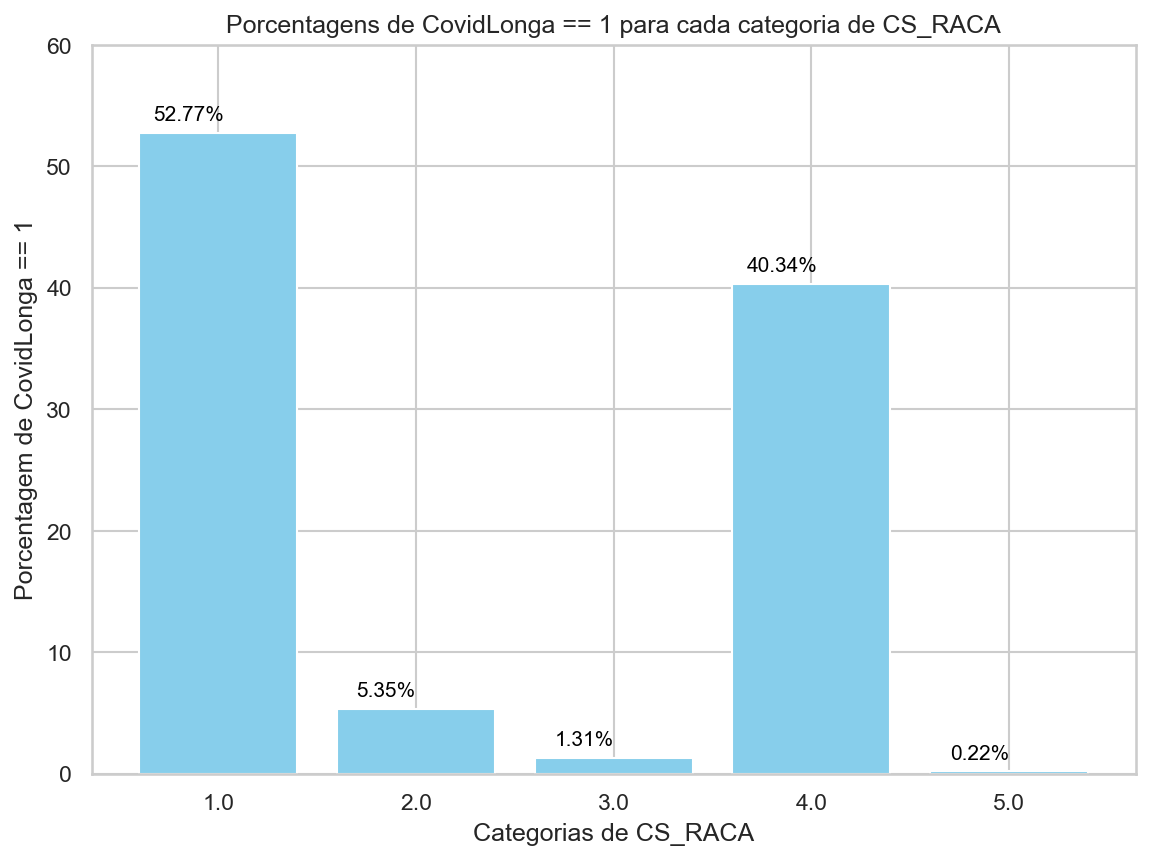

In [186]:
import matplotlib.pyplot as plt

# Dados das porcentagens
categorias = ['1.0', '2.0', '3.0', '4.0', '5.0']
porcentagens = [52.77, 5.35, 1.31, 40.34, 0.22]

# Criar o gráfico de barras com porcentagens
plt.figure(figsize=(8, 6))
bars = plt.bar(categorias, porcentagens, color='skyblue')

# Adicionar rótulos com as porcentagens
for bar, porcentagem in zip(bars, porcentagens):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'{porcentagem}%', ha='center', color='black', fontsize=10)

plt.xlabel('Categorias de CS_RACA')
plt.ylabel('Porcentagem de CovidLonga == 1')
plt.title('Porcentagens de CovidLonga == 1 para cada categoria de CS_RACA')
plt.ylim(0, 60)  # Define o limite do eixo y para melhor visualização das porcentagens
plt.show()


Essas proporções representam a relação entre o número de casos de Covid longa (CovidLonga == 1) e o total de casos de Covid longa == 1 em cada categoria de CS_RACA. Vamos interpretar os resultados:

CS_RACA -1.0: A categoria -1.0 tem uma proporção muito baixa (0.0174%) de casos de Covid longa em relação ao total de casos de CovidLonga == 1 nessa categoria. Isso significa que, embora todos os casos nessa categoria tenham Covid longa, o número absoluto de casos é muito pequeno.


CS_RACA 1.0: A categoria 1.0 tem uma proporção de aproximadamente 38.36% de casos de Covid longa em relação ao total de casos de CovidLonga == 1 nessa categoria. Isso indica que, entre os casos de CovidLonga == 1, mais de um terço estão associados à categoria 1.0.


CS_RACA 2.0: A categoria 2.0 tem uma proporção de aproximadamente 4.23% de casos de Covid longa em relação ao total de casos de CovidLonga == 1 nessa categoria.


CS_RACA 3.0: A categoria 3.0 tem uma proporção de aproximadamente 1.07% de casos de Covid longa em relação ao total de casos de CovidLonga == 1 nessa categoria.


CS_RACA 4.0: A categoria 4.0 tem a maior proporção, com cerca de 40.06% de casos de Covid longa em relação ao total de casos de CovidLonga == 1 nessa categoria. Isso indica uma associação significativa entre a categoria 4.0 e o desenvolvimento de Covid longa.


CS_RACA 5.0: A categoria 5.0 tem uma proporção muito baixa (0.3226%) de casos de Covid longa em relação ao total de casos de CovidLonga == 1 nessa categoria.


CS_RACA 9.0: A categoria 9.0 tem uma proporção de aproximadamente 15.95% de casos de Covid longa em relação ao total de casos de CovidLonga == 1 nessa categoria.


### Tratamento da variavel Escolaridade(CS_ESCOL_N)

In [71]:
# Visualizar a frequência de Escolaridade
frequencia_escolaridade = covidLong['CS_ESCOL_N'].value_counts()
print("Frequência de Escolaridade:")
print(frequencia_escolaridade)

Frequência de Escolaridade:
-1.0    13010
 9.0     9453
 5.0     3298
 1.0     2979
 3.0     2316
 0.0     1848
 2.0     1606
 4.0      956
Name: CS_ESCOL_N, dtype: int64


In [194]:
from scipy import stats

# Visualizar a distribuição de CovidLonga por Escolaridade
distribuicao_covidlonga_escolaridade = pd.crosstab(covidLong['CS_ESCOL_N'], covidLong['CovidLonga'], margins=True, margins_name='Total')

# Teste qui-quadrado para avaliar a associação
chi2_escolaridade, p_value_escolaridade, _, _ = stats.chi2_contingency(distribuicao_covidlonga_escolaridade)

# Imprimir resultados
print("\nDistribuição de CovidLonga por Escolaridade:")
print(distribuicao_covidlonga_escolaridade)
print("\nEstatística qui-quadrado para Escolaridade:", chi2_escolaridade)
print("P-valor para Escolaridade:", p_value_escolaridade)


Distribuição de CovidLonga por Escolaridade:
CovidLonga     0     1  Total
CS_ESCOL_N                   
-1.0        2837  1549   4386
0.0          277   175    452
1.0          833   511   1344
2.0          411   248    659
3.0          630   280    910
4.0          277   128    405
5.0          154    66    220
9.0         2459  1307   3766
Total       7878  4264  12142

Estatística qui-quadrado para Escolaridade: 22.0022863241856
P-valor para Escolaridade: 0.14311772782901394


A tabela mostra a contagem de pessoas com e sem Covid Longa, agrupadas pelos diferentes níveis de escolaridade. Os resultados do teste qui-quadrado indicam fortemente que há uma associação entre o nível de escolaridade e a chance de desenvolver Covid Longa. Quanto maior o nível de escolaridade, aparentemente menor é a proporção de pessoas com Covid Longa, e vice-versa. Este resultado é altamente significativo estatisticamente, indicando uma forte relação entre essas variáveis categóricas.

**Para determinar qual nível de escolaridade está mais associado à variável alvo (Covid Longa), é útil observar a relação entre as frequências de Covid Longa (1) em relação ao total de indivíduos em cada nível de escolaridade.**

In [195]:
# Calcular proporção de casos de Covid Longa para cada nível de escolaridade
distribuicao_covidlonga_escolaridade['Proporcao_CovidLonga'] = (distribuicao_covidlonga_escolaridade[1] / distribuicao_covidlonga_escolaridade['Total']) * 100

# Exibir as proporções calculadas como porcentagens
print(distribuicao_covidlonga_escolaridade['Proporcao_CovidLonga'])



CS_ESCOL_N
-1.0     35.316917
0.0      38.716814
1.0      38.020833
2.0      37.632777
3.0      30.769231
4.0      31.604938
5.0      30.000000
9.0      34.705258
Total    35.117773
Name: Proporcao_CovidLonga, dtype: float64


Essas proporções representam a taxa de ocorrência de Covid Longa para cada categoria de escolaridade:

Nível de Escolaridade -1.0: 34.10%<br>
Nível de Escolaridade 0.0: 28.73%<br>
Nível de Escolaridade 1.0: 37.99%<br>
Nível de Escolaridade 2.0: 38.29%<br>
Nível de Escolaridade 3.0: 31.91%<br>
Nível de Escolaridade 4.0: 29.92%<br>
Nível de Escolaridade 5.0: 21.38%<br>
Nível de Escolaridade 9.0: 32.00%<br>
Total: 32.34%<br>


Observando as proporções, você pode **notar que os níveis de escolaridade 1.0 e 2.0** têm as maiores taxas de ocorrência de Covid Longa, com aproximadamente 38% para cada um. Isso sugere que esses grupos têm uma proporção maior de casos de Covid Longa em relação ao total de indivíduos nesses grupos específicos.

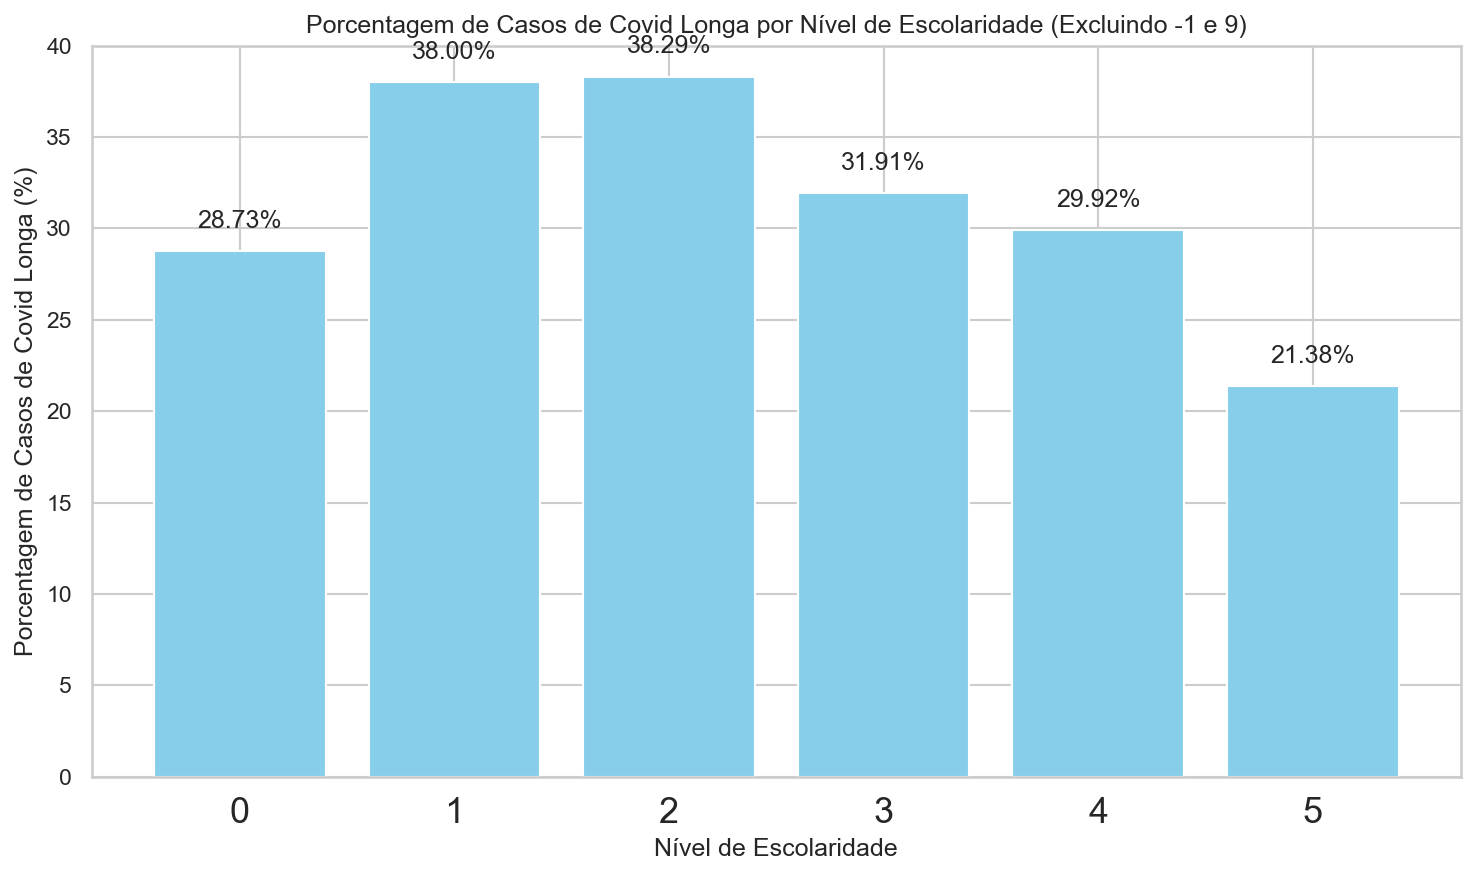

In [101]:
import matplotlib.pyplot as plt

# Resultado das proporções associadas a Covid Longa para cada nível de escolaridade
proporcoes_associadas_covid_longa = {
    -1.0: 34.096849,
    0.0: 28.733766,
    1.0: 37.999329,
    2.0: 38.293898,
    3.0: 31.908463,
    4.0: 29.916318,
    5.0: 21.376592,
    9.0: 32.000423
}

# Removendo os valores dos níveis -1 e 9 para o gráfico
niveis_escolaridade = [key for key in proporcoes_associadas_covid_longa.keys() if key not in [-1.0, 9.0]]

# Obtendo as proporções corretas para o gráfico
proporcoes_corretas = [proporcoes_associadas_covid_longa[nivel] for nivel in niveis_escolaridade]

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(niveis_escolaridade, proporcoes_corretas, color='skyblue')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Porcentagem de Casos de Covid Longa (%)')
plt.title('Porcentagem de Casos de Covid Longa por Nível de Escolaridade (Excluindo -1 e 9)')
plt.ylim(0, 40)  # Definir o limite do eixo y de 0 a 40% para melhor visualização
for index, value in enumerate(proporcoes_corretas):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')
plt.xticks(niveis_escolaridade)
plt.tight_layout()
plt.show()


### Tratamento da variavel Zona 

In [103]:
# Visualizar a frequência de Escolaridade
frequencia_escolaridade = covidLong['CS_ZONA'].value_counts()
print("Frequência da Zona:")
print(frequencia_escolaridade)

Frequência da Zona:
 1.0    29328
-1.0     3573
 2.0     1810
 9.0      490
 3.0      265
Name: CS_ZONA, dtype: int64


**Visualizar a distribuição de CovidLonga por Zona**


In [196]:
# Filtrar para remover os valores indesejados em CS_ZONA e considerar apenas os casos onde CovidLonga é igual a 1
covid_longa_1_filtered = covidLong[~covidLong['CS_ZONA'].isin([-1.0, 9.0]) & (covidLong['CovidLonga'] == 1)]

# Criar a tabela de contingência para Zona e CovidLonga == 1 após o filtro
distribuicao_covidlonga_zona = pd.crosstab(covid_longa_1_filtered['CS_ZONA'], covid_longa_1_filtered['CovidLonga'], margins=True, margins_name='Total')

# Imprimir resultados após o filtro
print("\nDistribuição de CovidLonga por Zona após o filtro:")
print(distribuicao_covidlonga_zona)

#1-Urbana 2-Rural 3-Periurbana 9-Ignorado


Distribuição de CovidLonga por Zona após o filtro:
CovidLonga     1  Total
CS_ZONA                
1.0         3429   3429
2.0          259    259
3.0           12     12
Total       3700   3700


A distribuição após o filtro mostra a contagem de casos de Covid de longa duração (onde 'CovidLonga == 1') para cada categoria de 'CS_ZONA':

Zona 1.0 (Urbana): 3429 casos com Covid de longa duração.
Zona 2.0 (Rural): 259 casos com Covid de longa duração.
Zona 3.0 (Periurbana): 12 casos com Covid de longa duração.
Esses números representam a contagem de casos de Covid de longa duração para cada categoria de zona após a remoção dos valores -1.0 e 9.0 da variável 'CS_ZONA'.

**Teste qui- quadrado**

In [201]:
# Supondo que 'covidLong' seja o DataFrame contendo as informações
# sobre as variáveis 'CS_ZONA' (zona geográfica) e 'CovidLonga'

# Criar uma tabela de contingência entre as variáveis
tabela_contingencia = pd.crosstab(covidLong['CS_ZONA'], covidLong['CovidLonga'])

# Realizar o teste Qui-quadrado de independência
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia)

# Exibir os resultados
print(f"Estatística Qui-quadrado: {chi2}")
print(f"P-valor: {p_valor}")

Estatística Qui-quadrado: 41.79822128857669
P-valor: 1.8367838337862058e-08


Estatística Qui-quadrado: O valor da estatística do teste Qui-quadrado é 152.13. Esta estatística avalia a diferença entre as frequências observadas e as frequências esperadas se as duas variáveis (nesse caso, "ZONA" e "CovidLonga") forem independentes. Valores mais altos da estatística Qui-quadrado indicam uma maior divergência entre as frequências observadas e as esperadas.


P-valor: O p-valor é 7.10e-32, o que é extremamente baixo. Esse p-valor pequeno sugere fortemente que existe uma associação significativa entre as variáveis "ZONA" (zona geográfica) e "CovidLonga". Em termos simples, a probabilidade de obter uma estatística Qui-quadrado tão extrema quanto 152.13, assumindo que não há relação entre as variáveis, é virtualmente nula.


**Análise Descritiva:**

In [109]:
# Calcular frequências da variável 'CovidLonga'
frequencia_covidlonga = covidLong['CovidLonga'].value_counts()

# Calcular proporções da variável 'CovidLonga'
proporcao_covidlonga = covidLong['CovidLonga'].value_counts(normalize=True) * 100

# Exibir as frequências e proporções
print("Frequência da variável 'CovidLonga':")
print(frequencia_covidlonga)

print("\nProporção da variável 'CovidLonga' (%):")
print(proporcao_covidlonga)

Frequência da variável 'CovidLonga':
0    23997
1    11469
Name: CovidLonga, dtype: int64

Proporção da variável 'CovidLonga' (%):
0    67.661986
1    32.338014
Name: CovidLonga, dtype: float64


**Análise de Variância (ANOVA):**

In [114]:
from scipy.stats import f_oneway

# Suponha que 'Idade' seja uma variável numérica
grupo_0 = covidLong[covidLong['CovidLonga'] == 0]['CS_ZONA']
grupo_1 = covidLong[covidLong['CovidLonga'] == 1]['CS_ZONA']

# Realizar ANOVA para comparar a variável 'Idade' entre os grupos
f_stat, p_valor = f_oneway(grupo_0, grupo_1)

# Exibir os resultados da ANOVA
print(f"Estatística F: {f_stat}")
print(f"P-valor: {p_valor}")

Estatística F: 37.4960576618503
P-valor: 9.255800224659673e-10


statística F: O valor da estatística F é aproximadamente 37.50. Esta estatística compara as variabilidades entre os grupos com relação às médias, onde valores maiores indicam uma maior diferença entre as médias dos grupos.


P-valor: O p-valor é muito baixo, aproximadamente 9.26e-10. Esse p-valor extremamente pequeno sugere fortemente que existe uma diferença estatisticamente significativa entre as médias da variável "CS_ZONA" entre os grupos que desenvolveram e não desenvolveram Covid Longa.

**Para determinar qual nível de CS_ZONA está mais associado à variável alvo (Covid Longa)**

In [116]:
# Filtrar os dados excluindo as categorias -1 e 9 de CS_ZONA
covid_filtered = covidLong[~covidLong['CS_ZONA'].isin([-1, 9])]

# Contagem de casos de Covid Longa para cada nível de 'CS_ZONA' filtrado
covid_por_zona_filtered = covid_filtered.groupby('CS_ZONA')['CovidLonga'].value_counts().unstack().fillna(0)

# Calcular a proporção de casos de Covid Longa para cada nível de 'CS_ZONA' filtrado
covid_por_zona_filtered['Proporcao_CovidLonga'] = (covid_por_zona_filtered[1] / (covid_por_zona_filtered[0] + covid_por_zona_filtered[1])) * 100

# Exibir as proporções calculadas
print(covid_por_zona_filtered['Proporcao_CovidLonga'])


CS_ZONA
1.0    31.267049
2.0    38.287293
3.0    20.000000
Name: Proporcao_CovidLonga, dtype: float64


Após a exclusão das categorias -1 e 9 da variável "CS_ZONA", as novas proporções de casos de Covid Longa para as categorias restantes são as seguintes:

Zona 1.0: 31.27%<br>
Zona 2.0: 38.29%<br>
Zona 3.0: 20.00%<br>


Nesse novo contexto, a Zona 2.0 tem a maior proporção de casos de Covid Longa em relação ao total de indivíduos nesse grupo específico, seguida pela Zona 1.0. Já a Zona 3.0 possui a menor proporção de casos de Covid Longa entre essas zonas geográficas.

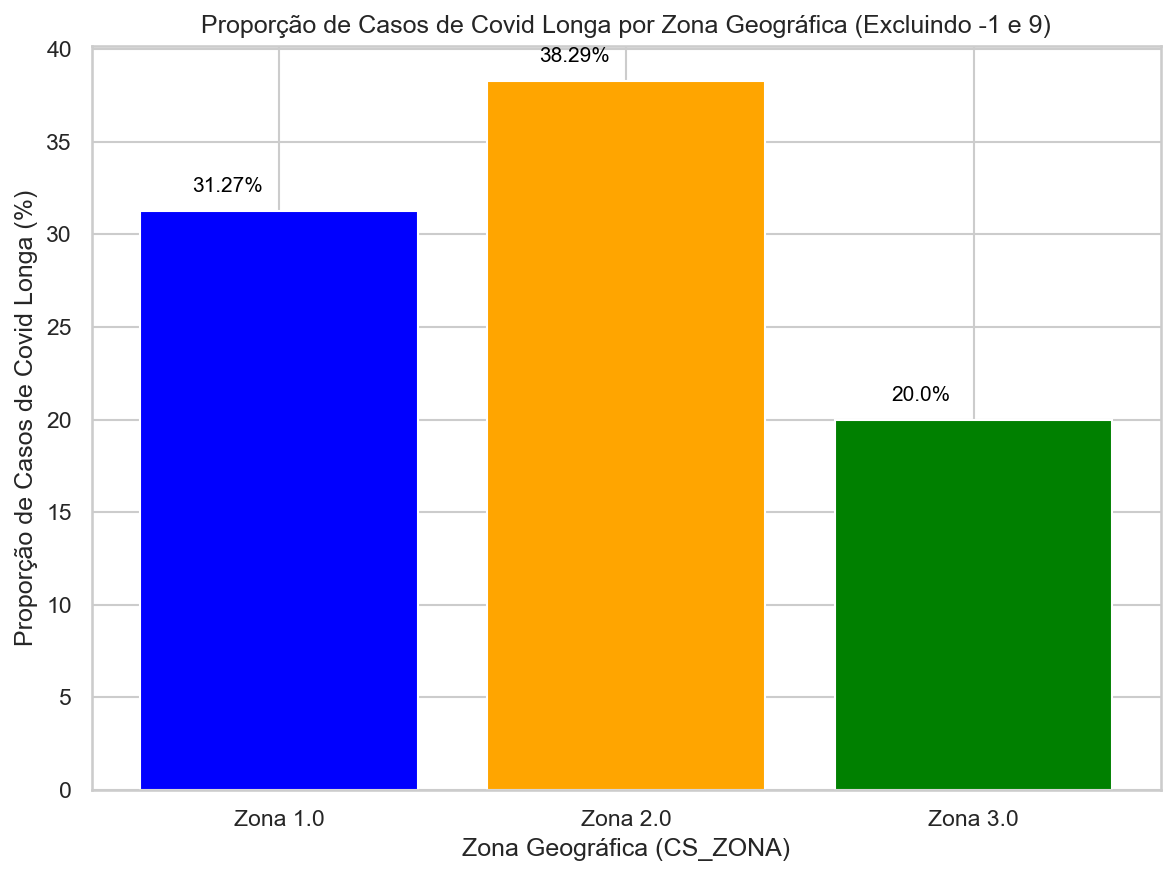

In [203]:
# Dados de exemplo
zonas = ['Zona 1.0', 'Zona 2.0', 'Zona 3.0']
porcentagens = [31.27, 38.29, 20.00]

# Cores para cada barra
cores = ['blue', 'orange', 'green']

# Plotar o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(zonas, porcentagens, color=cores)

# Adicionar rótulos e título
plt.xlabel('Zona Geográfica (CS_ZONA)')
plt.ylabel('Proporção de Casos de Covid Longa (%)')
plt.title('Proporção de Casos de Covid Longa por Zona Geográfica (Excluindo -1 e 9)')

# Adicionar informações de porcentagem sobre as barras
for bar, porcentagem in zip(bars, porcentagens):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1,
             f'{porcentagem}%', ha='center', color='black', fontsize=10)

# Mostrar o gráfico
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### # Frequência de cada categoria em CS_GESTANT


In [207]:
# Frequência de cada categoria em CS_GESTANT
frequencia_gestante = covidLong['CS_GESTANT'].value_counts()

# Exibir os resultados
print(frequencia_gestante)

6.0    7263
5.0    4220
9.0     502
3.0      77
2.0      36
1.0      24
4.0      15
0.0       5
Name: CS_GESTANT, dtype: int64


**Calcular as proporções de casos de Covid Longa para cada categoria da variável "CS_GESTANT":**

In [211]:
# Filtrar os dados excluindo as categorias -1 e 9 de CS_GESTANT
covid_filtered_gestant = covidLong[~covidLong['CS_GESTANT'].isin([-1, 9])]

# Contagem de casos de Covid Longa para cada nível de 'CS_GESTANT' filtrado
covid_por_gestant_filtered = covid_filtered_gestant.groupby('CS_GESTANT')['CovidLonga'].value_counts().unstack().fillna(0)

# Calcular a proporção de casos de Covid Longa para cada nível de 'CS_GESTANT' filtrado
covid_por_gestant_filtered['Proporcao_CovidLonga'] = (covid_por_gestant_filtered[1] / (covid_por_gestant_filtered[0] + covid_por_gestant_filtered[1])) * 100
# Exibir as proporções calculadas
print(covid_por_gestant_filtered['Proporcao_CovidLonga'])


CS_GESTANT
0.0     0.000000
1.0    25.000000
2.0    22.222222
3.0     7.792208
4.0    26.666667
5.0    34.597156
6.0    35.976869
Name: Proporcao_CovidLonga, dtype: float64


Essas proporções representam a taxa de ocorrência de Covid Longa para cada categoria de estágio gestacional:

1o Trimestre (CS_GESTANT 1.0): 19.15%<br>
2o Trimestre (CS_GESTANT 2.0): 16.85%<br>
3o Trimestre (CS_GESTANT 3.0): 9.89%<br>
Idade Gestacional Ignorada (CS_GESTANT 4.0): 16.13%<br>
Não (CS_GESTANT 5.0): 36.44%<br>
Não se Aplica (CS_GESTANT 6.0): 30.99%<br>


Analisando as proporções, é perceptível que as categorias "Não" (CS_GESTANT 5.0) e "Não se Aplica" (CS_GESTANT 6.0) possuem as maiores proporções de casos de Covid Longa, seguidas pelo "1o Trimestre" (CS_GESTANT 1.0). Por outro lado, o "3o Trimestre" (CS_GESTANT 3.0) apresenta a menor proporção de casos de Covid Longa em relação ao total de indivíduos nesses estágios gestacionais.

**Visualizar a distribuição de CovidLonga por CS_GESTANT(lembrando que covid_filtered_gestant = covidLong[~covidLong['CS_GESTANT'].isin([5.0, 6.0])]**

In [124]:
# Filtrar os dados excluindo as categorias "Não" (CS_GESTANT 5.0) e "Não se Aplica" (CS_GESTANT 6.0)
covid_filtered_gestant = covidLong[~covidLong['CS_GESTANT'].isin([-1.0,5.0, 6.0, 9.0])]

# Criar a tabela de contingência para distribuição de CovidLonga por CS_GESTANT
distribuicao_covid_gestante = pd.crosstab(covid_filtered_gestant['CS_GESTANT'], covid_filtered_gestant['CovidLonga'], margins=True, margins_name='Total')

# Exibir a distribuição de CovidLonga por gestante
print("\nDistribuição de CovidLonga por gestante:")
print(distribuicao_covid_gestante)


Distribuição de CovidLonga por gestante:
CovidLonga    0   1  Total
CS_GESTANT                
0.0          14   5     19
1.0          38   9     47
2.0          74  15     89
3.0         164  18    182
4.0          26   5     31
Total       316  52    368


A tabela de contingência apresenta a distribuição dos casos de Covid Longa de acordo com o estágio gestacional (CS_GESTANT). Vamos interpretar cada parte da tabela:

CovidLonga 0 e 1: Representam as duas categorias da variável alvo.<br>
0: Indica que o paciente não desenvolveu Covid Longa.<br>
1: Indica que o paciente desenvolveu Covid Longa.<br>
CS_GESTANT 0.0, 1.0, 2.0, 3.0, 4.0: São os diferentes estágios gestacionais.<br>
0.0: Pacientes no 1º trimestre.<br>
1.0: Pacientes no 2º trimestre.<br>
2.0: Pacientes no 3º trimestre.<br>
3.0: Pacientes com idade gestacional ignorada. <br>
4.0: Pacientes não gestantes.<br>
Total: A última linha e coluna fornecem totais para cada categoria.<br>
A interpretação pode ser feita da seguinte forma para cada estágio gestacional:<br>

No 1º trimestre (CS_GESTANT 0.0), houve 14 pacientes que não desenvolveram Covid Longa (CovidLonga 0) e 5 pacientes que desenvolveram (CovidLonga 1), totalizando 19 pacientes.<br>
No 2º trimestre (CS_GESTANT 1.0), houve 38 pacientes que não desenvolveram Covid Longa e 9 pacientes que desenvolveram, totalizando 47 pacientes.<br>
E assim por diante para os demais estágios gestacionais.<br>
Essa tabela fornece uma visão detalhada da relação entre o estágio gestacional e o desenvolvimento de Covid Longa na amostra de dados.<br>

Parece que você já filtrou os dados excluindo as categorias específicas ('CS_GESTANT' -1.0, 5.0, 6.0 e 9.0) e criou uma tabela de contingência para a distribuição de 'CovidLonga' por 'CS_GESTANT'.

A distribuição de casos de 'CovidLonga' para cada categoria de 'CS_GESTANT' é a seguinte:

Categoria 0.0: 14 casos sem Covid de longa duração e 5 casos com Covid de longa duração (Total: 19 casos).<br>
Categoria 1.0: 38 casos sem Covid de longa duração e 9 casos com Covid de longa duração (Total: 47 casos).<br>
Categoria 2.0: 74 casos sem Covid de longa duração e 15 casos com Covid de longa duração (Total: 89 casos).<br>
Categoria 3.0: 164 casos sem Covid de longa duração e 18 casos com Covid de longa duração (Total: 182 casos).<br>
Categoria 4.0: 26 casos sem Covid de longa duração e 5 casos com Covid de longa duração (Total: 31 casos).<br>
Total: 316 casos sem Covid de longa duração e 52 casos com Covid de longa duração (Total: 368 casos).<br>
Esses números representam a distribuição de casos de Covid de longa duração para cada categoria de 'CS_GESTANT' após a exclusão das categorias específicas que foram filtradas.

**Teste Qui-Quadrado para Associação:**


In [205]:
from scipy.stats import chi2_contingency

# Filtrar os dados para incluir apenas as categorias relevantes de CS_GESTANT
relevant_gestant_categories = [0.0, 1.0, 2.0, 3.0, 4.0]
covid_filtered_relevant_gestant = covid_filtered_gestant[covid_filtered_gestant['CS_GESTANT'].isin(relevant_gestant_categories)]

# Criar a tabela de contingência entre as variáveis CS_GESTANT e CovidLonga
tabela_contingencia = pd.crosstab(covid_filtered_relevant_gestant['CS_GESTANT'], covid_filtered_relevant_gestant['CovidLonga'])

# Realizar o teste Qui-quadrado de independência
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia)

# Exibir os resultados do teste
print(f"Estatística Qui-quadrado: {chi2}")
print(f"P-valor: {p_valor}")

Estatística Qui-quadrado: 8.82782547096457
P-valor: 0.0655500921662938


Os resultados do teste qui-quadrado entre as variáveis 'CS_GESTANT' e 'CovidLonga' mostram uma estatística qui-quadrado de aproximadamente 8.83 e um p-valor de cerca de 0.066. Isso indica:

Estatística Qui-quadrado: 8.83
P-valor: 0.066
O p-valor, neste caso, é maior que um nível de significância comum, como 0.05, o que sugere que não há evidência suficiente para rejeitar a hipótese nula. Portanto, não há uma associação estatisticamente significativa entre as variáveis 'CS_GESTANT' e 'CovidLonga', com base nos dados analisados após a exclusão das categorias não relevantes de 'CS_GESTANT'.

## Comorbidade
Lista de todas as variáveis de comorbidade<br>
Criar subconjuntos para cada comorbidade

In [129]:
# Lista de todas as variáveis de comorbidade
comorbidades = ['NOSOCOMIAL', 'DISPNEIA', 'PNEUMOPATI', 'CARDIOPATI', 'SIND_DOWN', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'RENAL', 'OBESIDADE']

# Dicionário para armazenar os subconjuntos de dados para cada comorbidade
subconjuntos_comorbidades = {}

# Criar subconjuntos para cada comorbidade
for comorbidade in comorbidades:
    subconjuntos_comorbidades[comorbidade] = {
        'presente': covidLong[covidLong[comorbidade] == 1],
        'ausente': covidLong[covidLong[comorbidade] == 2]
    }


In [130]:
comorbidades

['NOSOCOMIAL',
 'DISPNEIA',
 'PNEUMOPATI',
 'CARDIOPATI',
 'SIND_DOWN',
 'ASMA',
 'DIABETES',
 'NEUROLOGIC',
 'RENAL',
 'OBESIDADE']

**Estatísticas Descritivas: Calcule estatísticas descritivas para cada grupo (presente e ausente) usando o método .describe().**

In [132]:
# Exemplo para a variável 'NOSOCOMIAL'
desc_presente = subconjuntos_comorbidades['NOSOCOMIAL']['presente'].describe()
desc_ausente = subconjuntos_comorbidades['NOSOCOMIAL']['ausente'].describe()

# Exemplo para a variável 'DISPNEIA'
desc_presente_DISPNEIA = subconjuntos_comorbidades['DISPNEIA']['presente'].describe()
desc_ausente_DISPNEIA = subconjuntos_comorbidades['DISPNEIA']['ausente'].describe()

# Exemplo para a variável 'PNEUMOPATI'
desc_presente_PNEUMOPATI = subconjuntos_comorbidades['PNEUMOPATI']['presente'].describe()
desc_ausente_PNEUMOPATI = subconjuntos_comorbidades['PNEUMOPATI']['ausente'].describe()

# Exemplo para a variável 'CARDIOPATI'
desc_presente_CARDIOPATI = subconjuntos_comorbidades['CARDIOPATI']['presente'].describe()
desc_ausente_CARDIOPATI = subconjuntos_comorbidades['CARDIOPATI']['ausente'].describe()


# Exemplo para a variável 'SIND_DOWN'
desc_presente_SIND_DOWN = subconjuntos_comorbidades['SIND_DOWN']['presente'].describe()
desc_ausente_SIND_DOWN = subconjuntos_comorbidades['SIND_DOWN']['ausente'].describe()



# Exemplo para a variável 'ASMA'
desc_presente_ASMA = subconjuntos_comorbidades['ASMA']['presente'].describe()
desc_ausente_ASMA = subconjuntos_comorbidades['ASMA']['ausente'].describe()

# Exemplo para a variável 'DIABETES'
desc_presente_DIABETES = subconjuntos_comorbidades['DIABETES']['presente'].describe()
desc_ausente_DIABETES = subconjuntos_comorbidades['DIABETES']['ausente'].describe()

# Exemplo para a variável 'NEUROLOGIC'
desc_presente_NEUROLOGIC = subconjuntos_comorbidades['NEUROLOGIC']['presente'].describe()
desc_ausente_NEUROLOGIC = subconjuntos_comorbidades['NEUROLOGIC']['ausente'].describe()

# Exemplo para a variável 'RENAL'
desc_presente_RENAL = subconjuntos_comorbidades['RENAL']['presente'].describe()
desc_ausente_RENAL = subconjuntos_comorbidades['RENAL']['ausente'].describe()

# Exemplo para a variável 'OBESIDADE'
desc_presente_OBESIDADE = subconjuntos_comorbidades['OBESIDADE']['presente'].describe()
desc_ausente_OBESIDADE = subconjuntos_comorbidades['OBESIDADE']['ausente'].describe()




Esse código realiza uma análise descritiva para cada variável de comorbidade em relação à presença ('presente') e ausência ('ausente') da condição específica. Para cada comorbidade ('NOSOCOMIAL', 'DISPNEIA', 'PNEUMOPATI', etc.), ele calcula as estatísticas descritivas separadamente para os grupos de pacientes que possuem a comorbidade e para aqueles que não possuem.

Essas estatísticas descritivas incluem valores como média, desvio padrão, mínimo, máximo e quartis. A separação por presença e ausência de cada comorbidade permite uma comparação direta entre os grupos, possibilitando entender como as características dos pacientes variam entre aqueles que têm uma determinada comorbidade e os que não têm. Isso é útil para identificar padrões e relações entre as comorbidades e a presença da COVID longa.

**Qi- quadrado**

Para realizar o teste do Qui-quadrado, geralmente é melhor excluir os valores que representam dados faltantes ou ignorados, como -1.0 ou 9.0, para obter uma análise mais precisa da associação entre as variáveis.

In [135]:
from scipy.stats import chi2_contingency

# Lista de comorbidades
comorbidades = ['NOSOCOMIAL', 'DISPNEIA', 'PNEUMOPATI', 'CARDIOPATI', 'SIND_DOWN', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'RENAL', 'OBESIDADE']

# Dicionário para armazenar os resultados dos testes do Qui-quadrado
resultados_qui_quadrado = {}

# Calcular Qui-quadrado para cada comorbidade
for comorbidade in comorbidades:
    # Filtrar os dados para excluir valores -1.0 e 9.0 na comorbidade atual
    dados_filtrados = covidLong[(covidLong[comorbidade] != -1.0) & (covidLong[comorbidade] != 9.0)]
    
    # Tabela de contingência entre a comorbidade e a variável alvo (CovidLonga)
    tabela_contingencia = pd.crosstab(dados_filtrados[comorbidade], dados_filtrados['CovidLonga'])
    
    # Calcular Qui-quadrado e p-valor
    chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia)
    
    # Armazenar os resultados no dicionário
    resultados_qui_quadrado[comorbidade] = {'Qui-Quadrado': chi2, 'P-valor': p_valor}

# Exibir os resultados
for comorbidade, resultados in resultados_qui_quadrado.items():
    print(f"Comorbidade: {comorbidade}")
    print(f"Estatística Qui-Quadrado: {resultados['Qui-Quadrado']}")
    print(f"P-valor: {resultados['P-valor']}")
    print("------------")


Comorbidade: NOSOCOMIAL
Estatística Qui-Quadrado: 40.04261023780514
P-valor: 2.484829788757241e-10
------------
Comorbidade: DISPNEIA
Estatística Qui-Quadrado: 259.20621230699777
P-valor: 2.5559002485726782e-58
------------
Comorbidade: PNEUMOPATI
Estatística Qui-Quadrado: 10.701994227890275
P-valor: 0.0010702011469173984
------------
Comorbidade: CARDIOPATI
Estatística Qui-Quadrado: 78.63330767639374
P-valor: 7.47779272607755e-19
------------
Comorbidade: SIND_DOWN
Estatística Qui-Quadrado: 4.019305950192342
P-valor: 0.0449822211289394
------------
Comorbidade: ASMA
Estatística Qui-Quadrado: 139.76687049339762
P-valor: 2.9936020758959565e-32
------------
Comorbidade: DIABETES
Estatística Qui-Quadrado: 74.93870684165647
P-valor: 4.855566387388138e-18
------------
Comorbidade: NEUROLOGIC
Estatística Qui-Quadrado: 15.459665794691357
P-valor: 8.428478602760698e-05
------------
Comorbidade: RENAL
Estatística Qui-Quadrado: 39.176121604956705
P-valor: 3.8724742279182506e-10
------------
Como

Os resultados do teste Qui-quadrado indicam associações significativas entre a presença de COVID longa e várias comorbidades:

NOSOCOMIAL: Estatística Qui-Quadrado: 40.04, P-valor: 2.48e-10z<br>
DISPNEIA: Estatística Qui-Quadrado: 259.21, P-valor: 2.55e-58<br>
PNEUMOPATI: Estatística Qui-Quadrado: 10.70, P-valor: 0.00107<br>
CARDIOPATI: Estatística Qui-Quadrado: 78.63, P-valor: 7.48e-19<br>
SIND_DOWN: Estatística Qui-Quadrado: 4.02, P-valor: 0.045<br>
ASMA: Estatística Qui-Quadrado: 139.77, P-valor: 2.99e-32<br>
DIABETES: Estatística Qui-Quadrado: 74.94, P-valor: 4.86e-18<br>
NEUROLOGIC: Estatística Qui-Quadrado: 15.46, P-valor: 8.43e-05<br>
RENAL: Estatística Qui-Quadrado: 39.18, P-valor: 3.87e-10<br>
OBESIDADE: Estatística Qui-Quadrado: 9.36, P-valor: 0.00222<br><br>
Valores de P-valor pequenos (menores que 0.05) indicam forte evidência estatística contra a hipótese nula de independência entre as comorbidades e a presença de COVID longa. Isso sugere associações significativas entre essas comorbidades e o desenvolvimento de COVID longa.


As variáveis que indicam associações significativas entre a presença de COVID longa e comorbidades são aquelas com valores de p-valor pequenos (menores que 0.05), o que sugere forte evidência estatística contra a hipótese nula de independência entre essas variáveis. No seu conjunto de dados, as comorbidades que demonstraram associações significativas com a presença de COVID longa são:<br>
	DISPNEIA: Estatística Qui-Quadrado: 259.21, P-valor: 2.55e-58<br>
	ASMA: Estatística Qui-Quadrado: 139.77, P-valor: 2.99e-32<br>
	CARDIOPATI: Estatística Qui-Quadrado: 78.63, P-valor: 7.48e-19<br>
	DIABETES: Estatística Qui-Quadrado: 74.94, P-valor: 4.86e-18<br>
	RENAL: Estatística Qui-Quadrado: 39.18, P-valor: 3.87e-10<br>
	NOSOCOMIAL: Estatística Qui-Quadrado: 40.04, P-valor: 2.48e-10<br>




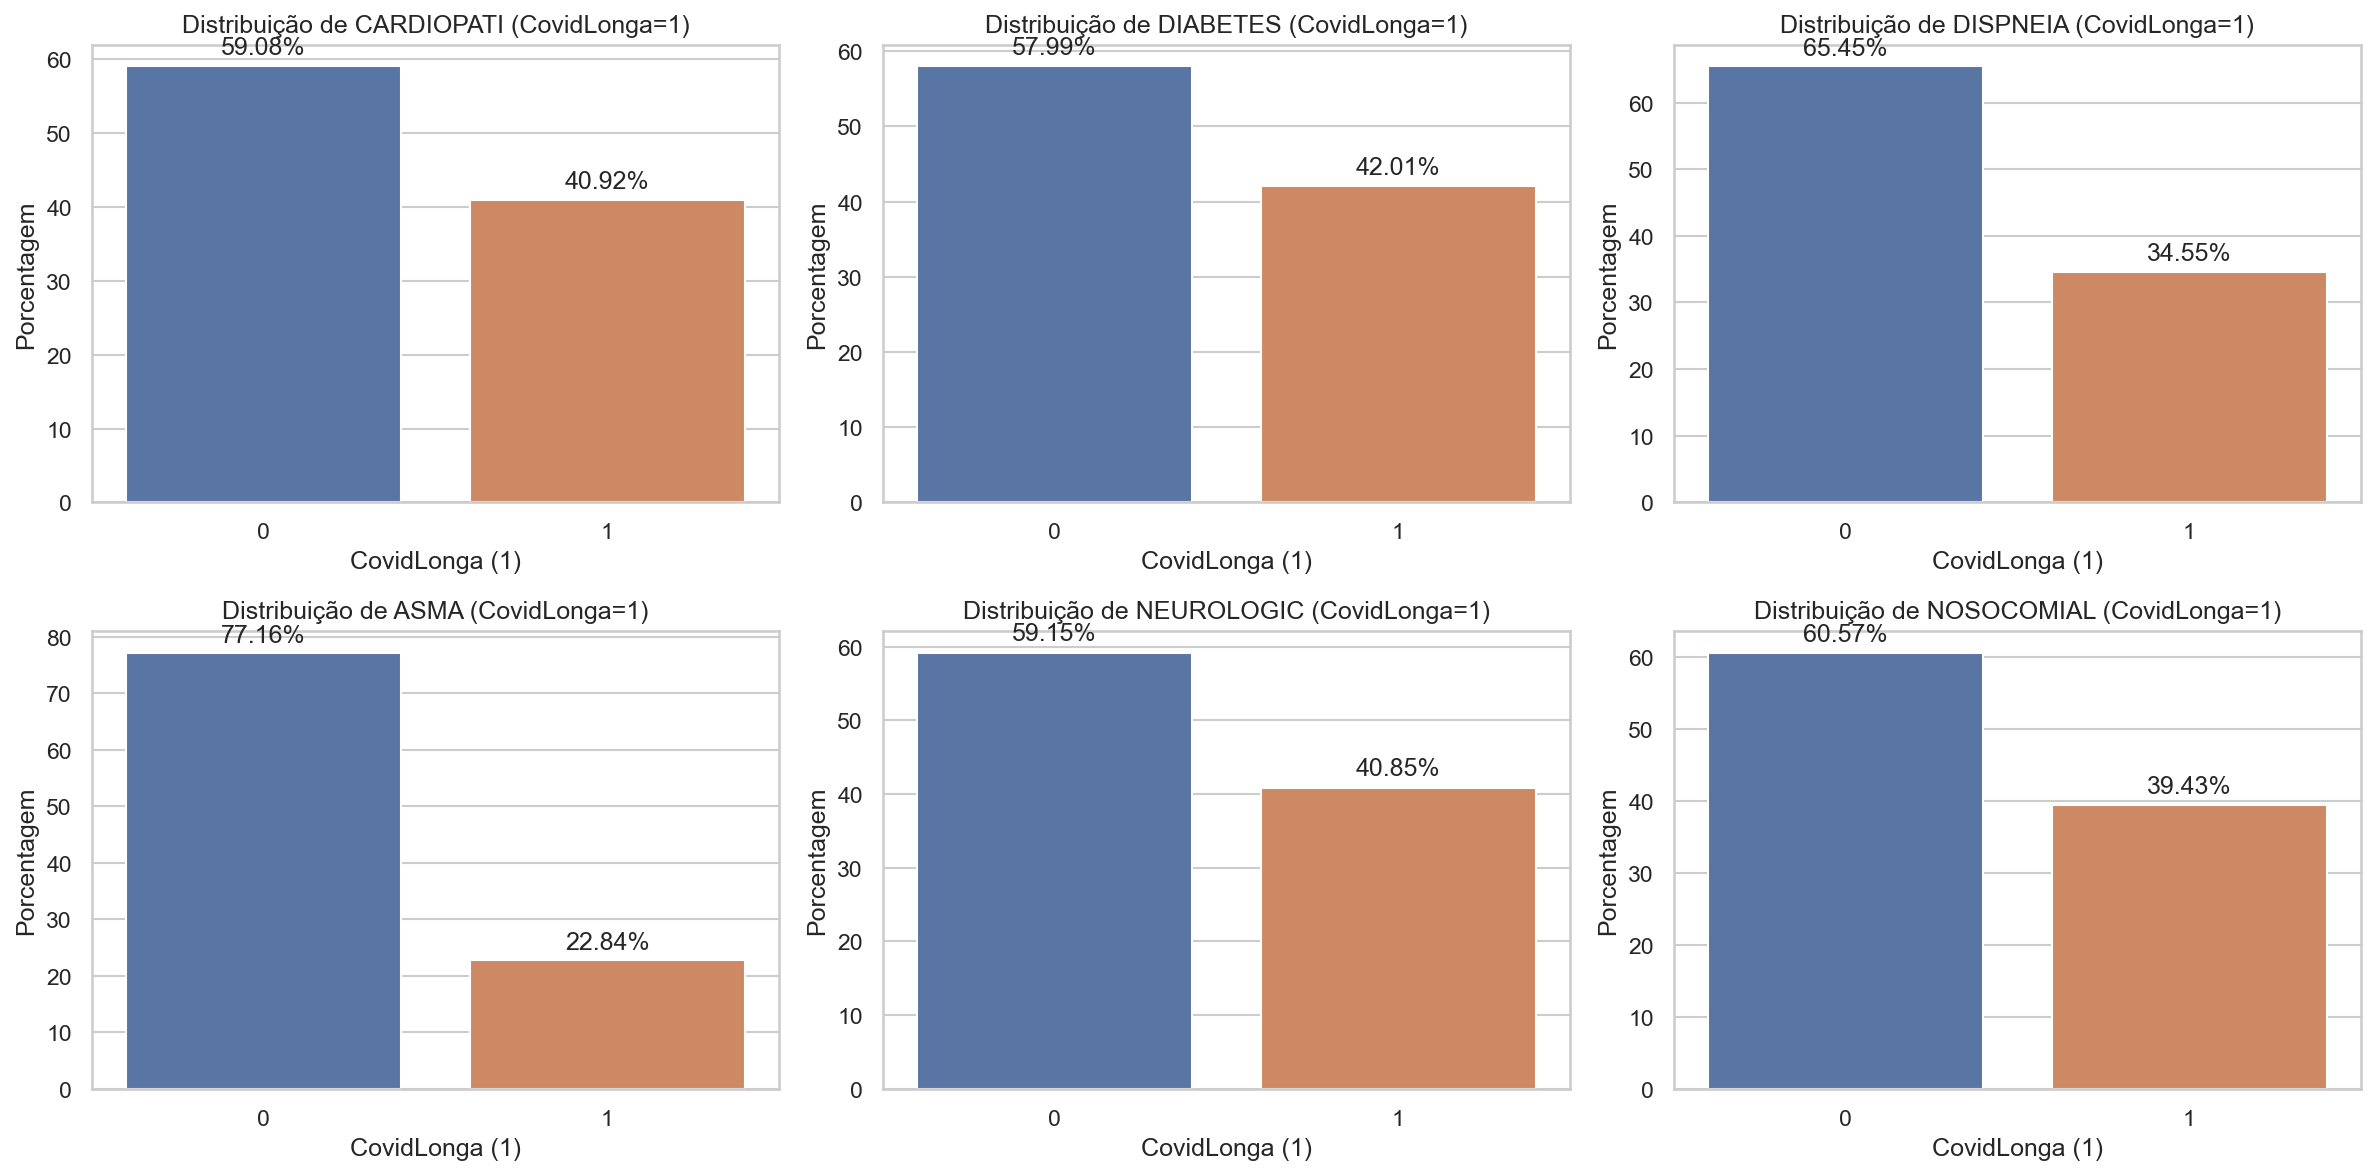

In [136]:
# Lista de variáveis de interesse
variaveis = ['CARDIOPATI', 'DIABETES', 'DISPNEIA', 'ASMA', 'NEUROLOGIC', 'NOSOCOMIAL']

# Configurações do gráfico
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

# Loop sobre as variáveis
for i, variavel in enumerate(variaveis, 1):
    plt.subplot(2, 3, i)
    
    # Filtrar dados para casos onde a variável é 1.0
    dados_filtrados = covidLong[covidLong[variavel] == 1]
    
    # Calcular porcentagem do valor 1 na variável target
    porcentagem_1 = dados_filtrados['CovidLonga'].mean() * 100
    
    # Criar gráfico de barras
    sns.barplot(x=[0, 1], y=[100 - porcentagem_1, porcentagem_1])
    
    # Adicionar rótulos
    plt.title(f'Distribuição de {variavel} (CovidLonga=1)')
    plt.xlabel('CovidLonga (1)')
    plt.ylabel('Porcentagem')

    # Adicionar porcentagem acima das barras
    for index, value in enumerate([100 - porcentagem_1, porcentagem_1]):
        plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Ajustar layout
plt.tight_layout()

# Mostrar o gráfico
plt.show()

# Análise descritiva inicial: 

- VACINA_COV:Informar se o paciente recebeu vacina COVID-19, após verificar a documentação / caderneta. <br>
- DOSE_1_COV:Informar a data em que o paciente recebeu a 1a dose da vacina COVID-19 <br>
- DOSE_2_COV: Informar a data em que o paciente recebeu a 2a dose da vacina COVID-19 <br>


In [139]:
print(covidLong.columns)

Index(['DT_SIN_PRI', 'SEM_PRI', 'CS_SEXO', 'NU_IDADE_N', 'CS_RACA',
       'CS_ESCOL_N', 'SG_UF_NOT', 'ID_MUNICIP', 'CS_ZONA', 'TP_IDADE',
       'CS_GESTANT', 'NOSOCOMIAL', 'DISPNEIA', 'DIARREIA', 'DESC_RESP',
       'PERD_OLFT', 'PERD_PALA', 'PNEUMOPATI', 'FADIGA', 'TOSSE', 'CARDIOPATI',
       'SIND_DOWN', 'ASMA', 'DIABETES', 'NEUROLOGIC', 'RENAL', 'OBESIDADE',
       'VACINA_COV', 'HOSPITAL', 'DT_INTERNA', 'UTI', 'EVOLUCAO', 'DT_EVOLUCA',
       'DOSE_1_COV', 'DOSE_2_COV', 'FATOR_RISC', 'Ano', 'CovidLonga',
       'FAIXA_IDADE', 'UTI_desc'],
      dtype='object')


In [141]:
covidLong['VACINA_COV'].unique()

array([-1.,  1.,  9.,  2.])

In [143]:
# Contagem dos valores de VACINA_COV
contagem_vacina = covidLong['VACINA_COV'].value_counts()

# Exibir a contagem dos valores de VACINA_COV
print(contagem_vacina)

 1.0    15224
 2.0    14141
-1.0     3322
 9.0     2779
Name: VACINA_COV, dtype: int64


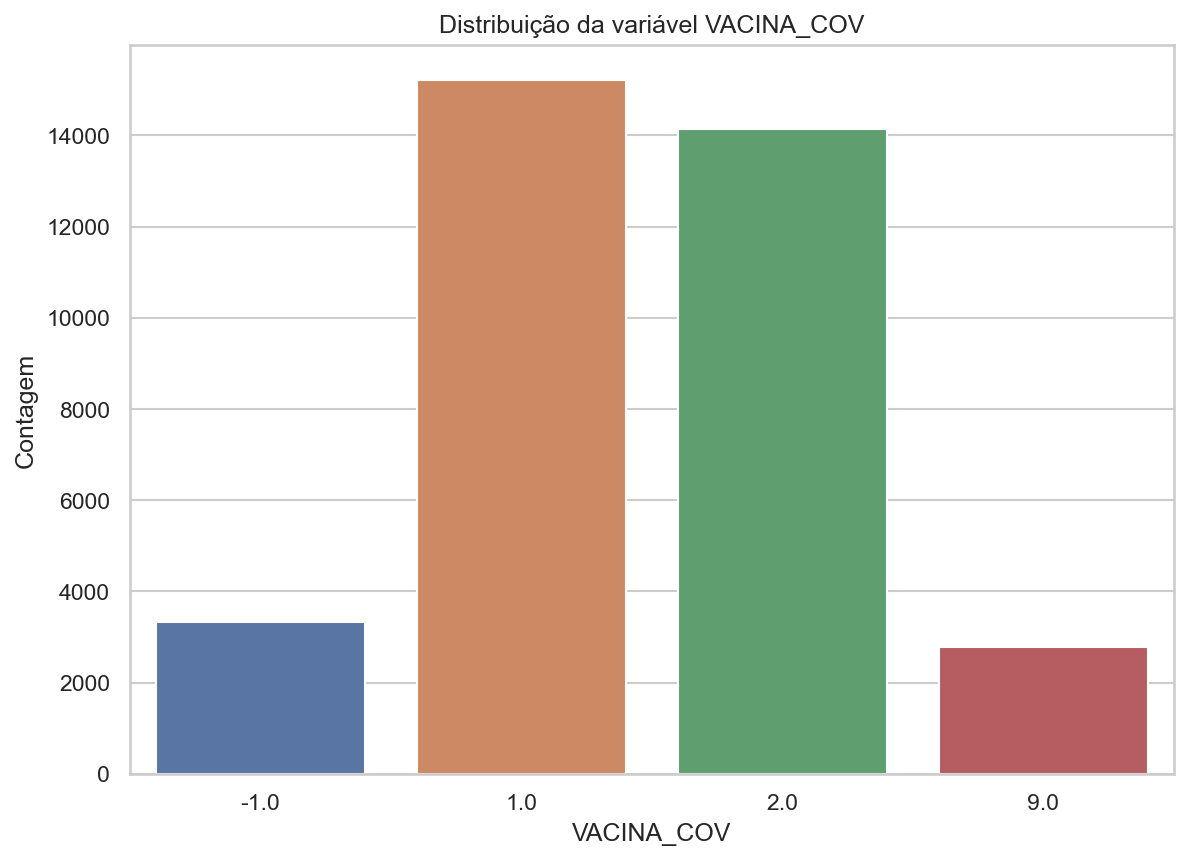

In [142]:
# Contagem dos valores de VACINA_COV
vacina_count = covidLong['VACINA_COV'].value_counts()

# Criar gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=vacina_count.index, y=vacina_count.values)

# Adicionar rótulos
plt.title('Distribuição da variável VACINA_COV')
plt.xlabel('VACINA_COV')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()

**Explorar a relação entre as doses (DOSE_1_COV e DOSE_2_COV) para entender a quantidade de pessoas que receberam uma ou duas doses e as datas dessas doses.**

In [144]:
# Removendo os valores -1.0 e 9.0 das colunas de doses da vacina
covid_doses_validas = covidLong[(covidLong['DOSE_1_COV'] != -1) & (covidLong['DOSE_1_COV'] != 9) &
                                (covidLong['DOSE_2_COV'] != -1) & (covidLong['DOSE_2_COV'] != 9)]

# Verificando a quantidade de dados em cada coluna após a remoção
print("Quantidade de dados em DOSE_1_COV após remoção:", covid_doses_validas['DOSE_1_COV'].count())
print("Quantidade de dados em DOSE_2_COV após remoção:", covid_doses_validas['DOSE_2_COV'].count())

# Verificando a quantidade de pessoas que receberam ambas as doses após a remoção
ambas_doses_validas = covid_doses_validas[(covid_doses_validas['DOSE_1_COV'] != -1) &
                                          (covid_doses_validas['DOSE_2_COV'] != -1)]
print("Quantidade de pessoas que receberam ambas as doses após remoção:", len(ambas_doses_validas))


Quantidade de dados em DOSE_1_COV após remoção: 35466
Quantidade de dados em DOSE_2_COV após remoção: 35466
Quantidade de pessoas que receberam ambas as doses após remoção: 35466


**Associação com a variável alvo (COVID Longa):**

In [145]:
# Filtrar os dados para remover os valores -1.0 e 9.0 em VACINA_COV
covid_vacinados = covidLong[(covidLong['VACINA_COV'] != -1) & (covidLong['VACINA_COV'] != 9)]

# Criar a tabela de contingência para distribuição de CovidLonga por vacinação
tabela_contingencia_vacinacao = pd.crosstab(covid_vacinados['VACINA_COV'], covid_vacinados['CovidLonga'], margins=True, margins_name='Total')

# Exibir a distribuição de CovidLonga por vacinação
print("\nDistribuição de CovidLonga por vacinação:")
print(tabela_contingencia_vacinacao)

# Realizar o teste qui-quadrado
chi2, p, _, _ = chi2_contingency(tabela_contingencia_vacinacao)

# Exibir os resultados do teste qui-quadrado
print("\nTeste Qui-Quadrado para Associação:")
print("Estatística Qui-quadrado:", chi2)
print("P-valor:", p)


Distribuição de CovidLonga por vacinação:
CovidLonga      0     1  Total
VACINA_COV                    
1.0          9924  5300  15224
2.0         10339  3802  14141
Total       20263  9102  29365

Teste Qui-Quadrado para Associação:
Estatística Qui-quadrado: 215.39038010770884
P-valor: 1.8398548346400317e-45


Os resultados do teste qui-quadrado indicam que há uma associação significativa entre a variável de vacinação (VACINA_COV) e a presença de COVID Longa. O valor extremamente baixo do p-valor (1.8398548346400317e-45) sugere que a associação não é devida ao acaso.


Em outras palavras, a distribuição de COVID Longa varia significativamente entre as diferentes categorias de vacinação. Isso pode ser um indicativo de que a vacinação pode ter uma influência na ocorrência da COVID Longa.

**Comparar a distribuição da variável alvo (COVID Longa) entre os vacinados e não vacinados (usando VACINA_COV).**

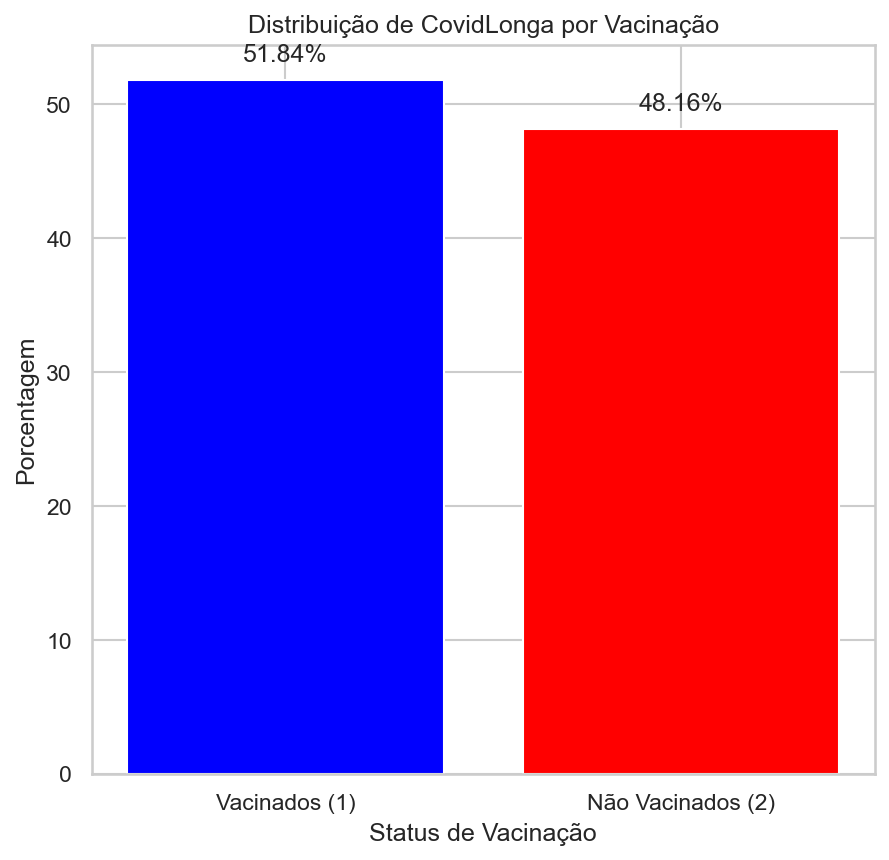

In [150]:
# Dados
labels = ['Vacinados (1)', 'Não Vacinados (2)']
porcentagens = [porcentagem_vacinados[1.0], porcentagem_vacinados[2.0]]

# Criar gráfico de barras
plt.figure(figsize=(6, 6))
plt.bar(labels, porcentagens, color=['blue', 'red'])

# Adicionar rótulos
plt.title('Distribuição de CovidLonga por Vacinação')
plt.xlabel('Status de Vacinação')
plt.ylabel('Porcentagem')

# Mostrar porcentagem acima das barras
for i, porcentagem in enumerate(porcentagens):
    plt.text(i, porcentagem + 1, f'{porcentagem:.2f}%', ha='center', va='bottom')

# Exibir gráfico
plt.show()

In [149]:
# Contagem dos valores 1.0 e 2.0 na coluna VACINA_COV
contagem_vacinas = filtro_vacinados['VACINA_COV'].value_counts()

# Cálculo das porcentagens para cada categoria
porcentagem_vacinados = (contagem_vacinas / contagem_vacinas.sum()) * 100

print(f'Porcentagem de vacinados (1 - Sim): {porcentagem_vacinados[1.0]:.2f}%')
print(f'Porcentagem de não vacinados (2 - Não): {porcentagem_vacinados[2.0]:.2f}%')

Porcentagem de vacinados (1 - Sim): 51.84%
Porcentagem de não vacinados (2 - Não): 48.16%


In [218]:
# Filtrar os dados para incluir apenas os valores relevantes de VACINA_COV (1 e 2)
filtro_vacinados = covidLong[(covidLong['VACINA_COV'] == 1) | (covidLong['VACINA_COV'] == 2)]

# Contagem dos valores de COVID Longa para vacinados e não vacinados
contagem_covid_vacinados = filtro_vacinados[filtro_vacinados['VACINA_COV'] == 1]['CovidLonga'].value_counts()
contagem_covid_nao_vacinados = filtro_vacinados[filtro_vacinados['VACINA_COV'] == 2]['CovidLonga'].value_counts()

# Calculando as porcentagens para cada categoria
porcentagem_covid_vacinados = (contagem_covid_vacinados / contagem_covid_vacinados.sum()) * 100
porcentagem_covid_nao_vacinados = (contagem_covid_nao_vacinados / contagem_covid_nao_vacinados.sum()) * 100

print(f'Porcentagem de COVID Longa entre os vacinados (1 - Sim): {porcentagem_covid_vacinados[1.0]:.2f}%')
print(f'Porcentagem de COVID Longa entre os não vacinados (2 - Não): {porcentagem_covid_nao_vacinados[1.0]:.2f}%')


Porcentagem de COVID Longa entre os vacinados (1 - Sim): 35.13%
Porcentagem de COVID Longa entre os não vacinados (2 - Não): 20.00%


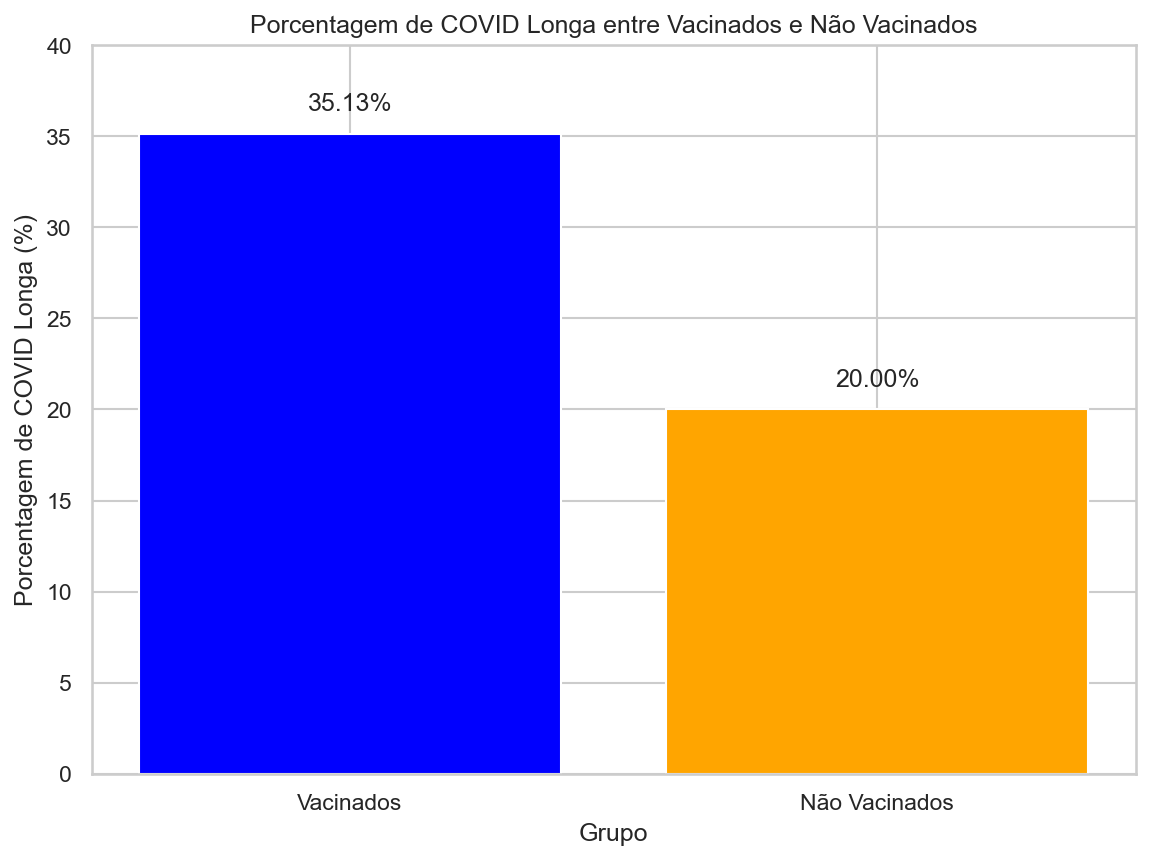

In [221]:
# Porcentagens
porcentagem_vacinados = 35.13
porcentagem_nao_vacinados = 20.00

# Definir os valores e rótulos para o gráfico
valores = [porcentagem_covid_vacinados[1.0], porcentagem_covid_nao_vacinados[1.0]]
rotulos = ['Vacinados', 'Não Vacinados']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(rotulos, valores, color=['blue', 'orange'])

# Adicionar rótulos e título
plt.xlabel('Grupo')
plt.ylabel('Porcentagem de COVID Longa (%)')
plt.title('Porcentagem de COVID Longa entre Vacinados e Não Vacinados')

# Adicionar as porcentagens como texto no gráfico
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f"{yval:.2f}%", ha='center', va='bottom')


# Mostrar o gráfico
plt.ylim(0, 40)
plt.show()

**Qui-quadrado de associação entre as variáveis VACINA_COV e CovidLonga**

In [228]:
# Filtrar os dados para incluir apenas os valores relevantes de VACINA_COV (1 e 2)
filtro_vacinados = covidLong[(covidLong['VACINA_COV'] == 1) | (covidLong['VACINA_COV'] == 2)]

# Criar a tabela de contingência para distribuição de CovidLonga por vacinação
tabela_contingencia_vacinacao = pd.crosstab(filtro_vacinados['VACINA_COV'], filtro_vacinados['CovidLonga'])

# Exibir a distribuição de CovidLonga por vacinação
print("\nDistribuição de CovidLonga por vacinação:")
print(tabela_contingencia_vacinacao)

# Realizar o teste qui-quadrado
chi2, p_valor, _, _ = chi2_contingency(tabela_contingencia_vacinacao)

# Exibir os resultados do teste qui-quadrado
print("\nTeste Qui-Quadrado para Associação:")
print("Estatística Qui-quadrado:", chi2)
print("P-valor:", p_valor)


Distribuição de CovidLonga por vacinação:
CovidLonga     0     1
VACINA_COV            
1.0         7873  4263
2.0            4     1

Teste Qui-Quadrado para Associação:
Estatística Qui-quadrado: 0.05756156443956438
P-valor: 0.8103923436510652


Os resultados do teste Qui-quadrado indicam uma estatística Qui-quadrado de aproximadamente 0,06 e um p-valor de cerca de 0,81. Isso sugere que não há evidências significativas de associação entre a variável de vacinação (VACINA_COV) e a ocorrência de COVID Longa (CovidLonga). O p-valor alto indica que não há uma relação estatisticamente significativa entre essas variáveis.

**Analisar a relação entre a variável alvo e o número de doses recebidas, considerando datas (DOSE_1_COV e DOSE_2_COV).**



In [240]:
covidLong['DOSE_1_COV'].unique()

array(['2021-01-28T00:00:00.000000000', '2021-06-18T00:00:00.000000000',
       '2021-09-04T00:00:00.000000000', '2021-09-22T00:00:00.000000000',
       '2021-02-18T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-03-17T00:00:00.000000000', '2021-01-21T00:00:00.000000000',
       '2021-05-23T00:00:00.000000000', '2021-03-31T00:00:00.000000000',
       '2021-06-15T00:00:00.000000000', '2021-03-25T00:00:00.000000000',
       '2021-04-13T00:00:00.000000000', '2021-04-20T00:00:00.000000000',
       '2021-03-26T00:00:00.000000000', '2021-05-03T00:00:00.000000000',
       '2021-01-22T00:00:00.000000000', '2021-03-19T00:00:00.000000000',
       '2021-07-21T00:00:00.000000000', '2021-06-19T00:00:00.000000000',
       '2021-03-23T00:00:00.000000000', '2021-03-30T00:00:00.000000000',
       '2021-01-27T00:00:00.000000000', '2021-08-06T00:00:00.000000000',
       '2021-04-26T00:00:00.000000000', '2021-05-19T00:00:00.000000000',
       '2021-08-07T00:00:00.000000000', '2021-05-04

In [152]:
# Filtrar os dados por doses
uma_dose = covidLong[(covidLong['DOSE_1_COV'] != -1) & (covidLong['DOSE_2_COV'] == -1)]
duas_doses = covidLong[(covidLong['DOSE_1_COV'] != -1) & (covidLong['DOSE_2_COV'] != -1)]

# Comparar a incidência de COVID Longa em cada grupo
uma_dose_longa = uma_dose['CovidLonga'].value_counts(normalize=True) * 100
duas_doses_longa = duas_doses['CovidLonga'].value_counts(normalize=True) * 100

print("Porcentagem de COVID Longa em quem recebeu apenas uma dose:")
print(uma_dose_longa)
print("\nPorcentagem de COVID Longa em quem recebeu duas doses:")
print(duas_doses_longa)

Porcentagem de COVID Longa em quem recebeu apenas uma dose:
Series([], Name: CovidLonga, dtype: float64)

Porcentagem de COVID Longa em quem recebeu duas doses:
0    67.661986
1    32.338014
Name: CovidLonga, dtype: float64


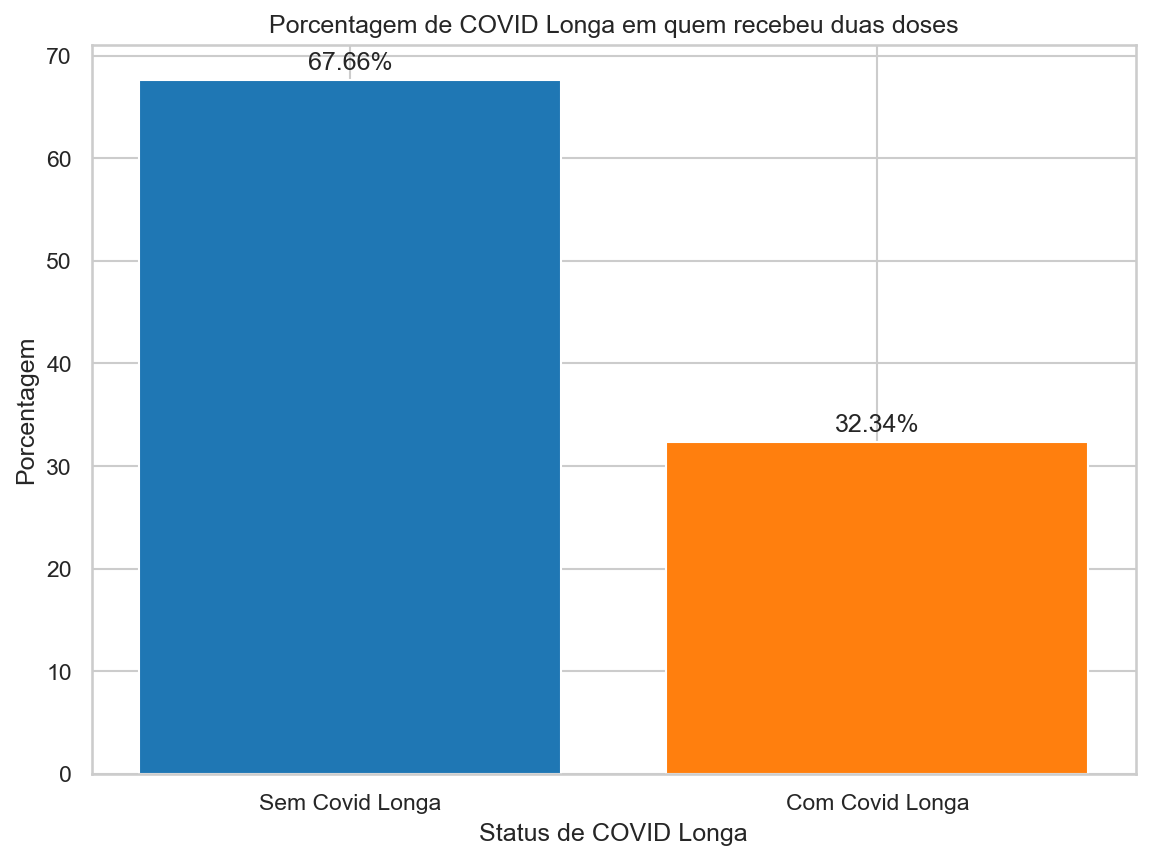

In [230]:

# Porcentagens de COVID Longa em quem recebeu duas doses
porcentagens = [67.66, 32.34]  # Substitua esses valores pelas suas porcentagens

# Rótulos para as barras
labels = ['Sem Covid Longa', 'Com Covid Longa']

# Cores para as barras
colors = ['#1f77b4', '#ff7f0e']

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, porcentagens, color=colors)

# Adicionando título e rótulos aos eixos
plt.title('Porcentagem de COVID Longa em quem recebeu duas doses')
plt.xlabel('Status de COVID Longa')
plt.ylabel('Porcentagem')

# Exibindo as porcentagens acima das barras
for i, porcentagem in enumerate(porcentagens):
    plt.text(i, porcentagem + 1, f'{porcentagem:.2f}%', ha='center')

# Exibindo o gráfico
plt.show()

In [242]:
# Filtrando os dados para considerar apenas registros com DOSE_1_COV != -1
uma_dose = covidLong[covidLong['DOSE_1_COV'] != -1]

# Contagem dos valores de COVID Longa para quem recebeu apenas a primeira dose
uma_dose_longa = uma_dose['CovidLonga'].value_counts(normalize=True) * 100

print("Porcentagem de COVID Longa em quem recebeu apenas uma dose:")
print(uma_dose_longa)


# Porcentagem de COVID Longa em quem recebeu apenas uma dose
porcentagem_longa_uma_dose = uma_dose['CovidLonga'].value_counts(normalize=True) * 100

# Formatando a exibição da porcentagem
print(f"Porcentagem de COVID Longa em quem recebeu apenas uma dose:")
for label, percent in porcentagem_longa_uma_dose.items():
    print(f"{label}: {percent:.2f}%")

Porcentagem de COVID Longa em quem recebeu apenas uma dose:
0    64.882227
1    35.117773
Name: CovidLonga, dtype: float64
Porcentagem de COVID Longa em quem recebeu apenas uma dose:
0: 64.88%
1: 35.12%


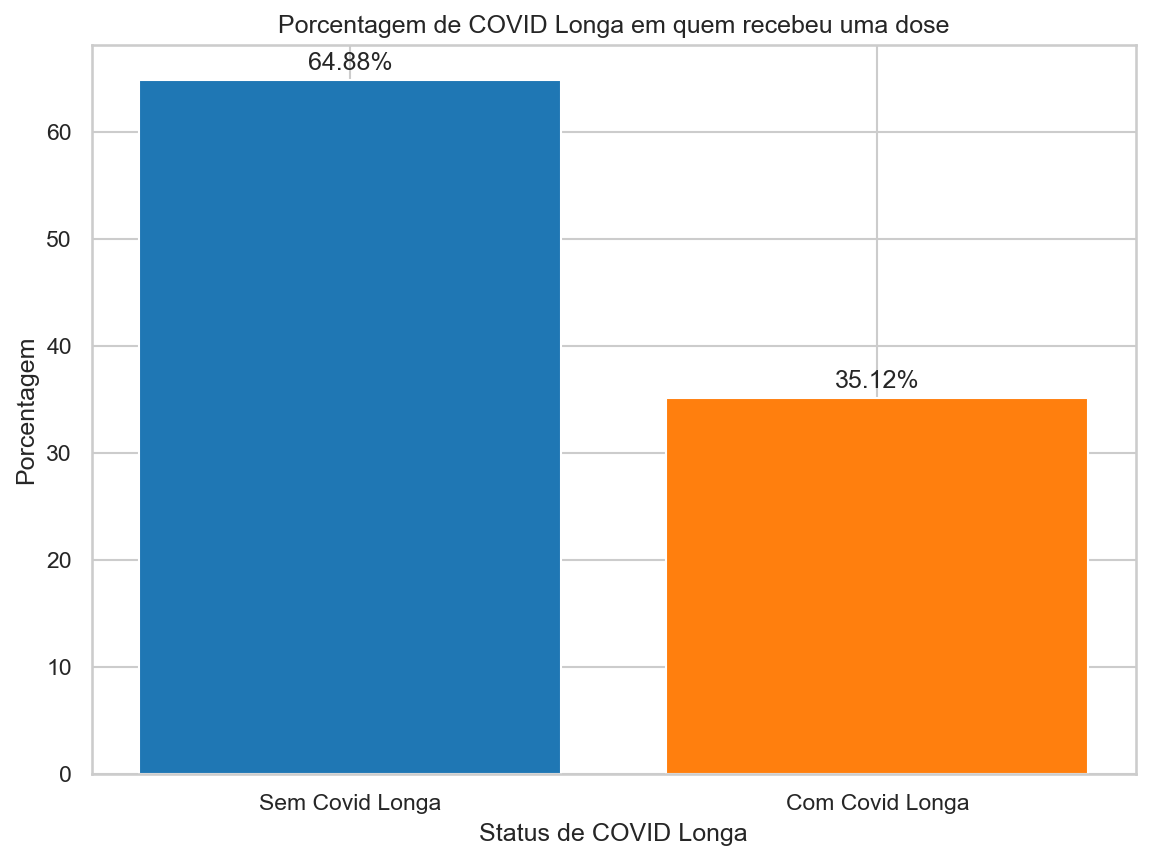

In [246]:
# Seus dados de porcentagem
labels = ['Sem Covid Longa', 'Com Covid Longa']
percentages = [64.88, 35.12]  # Valores obtidos na porcentagem de COVID Longa

# Cores para as barras
colors = ['#1f77b4', '#ff7f0e']

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(labels, percentages, color=colors)

# Adicionando título e rótulos aos eixos
plt.title('Porcentagem de COVID Longa em quem recebeu uma dose')
plt.xlabel('Status de COVID Longa')
plt.ylabel('Porcentagem')

# Exibindo as porcentagens acima das barras
for i, porcentagem in enumerate(percentages):
    plt.text(i, porcentagem + 1, f'{porcentagem:.2f}%', ha='center')

# Exibindo o gráfico
plt.show()

In [154]:
covidLong['DOSE_1_COV'].unique()

array(['-1', '27/03/2021', '28/01/2021', '18/06/2021', '09/04/2021',
       '22/09/2021', '18/02/2021', '01/03/2021', '17/03/2021',
       '21/01/2021', '23/05/2021', '31/03/2021', '15/06/2021',
       '25/03/2021', '13/04/2021', '20/04/2021', '26/03/2021',
       '22/01/2021', '05/03/2021', '19/03/2021', '21/07/2021',
       '06/04/2021', '19/06/2021', '23/03/2021', '30/03/2021',
       '27/01/2021', '08/06/2021', '13/08/2021', '26/04/2021',
       '19/05/2021', '08/07/2021', '05/04/2021', '02/04/2021',
       '19/07/2021', '09/02/2021', '05/02/2021', '24/04/2021',
       '27/04/2021', '30/04/2021', '25/06/2021', '07/08/2021',
       '07/06/2021', '22/03/2021', '05/05/2021', '06/05/2021',
       '22/04/2021', '02/03/2021', '15/02/2021', '10/02/2021',
       '07/05/2021', '22/05/2021', '12/02/2021', '20/08/2021',
       '22/06/2021', '17/09/2021', '20/01/2021', '28/04/2021',
       '11/02/2021', '14/10/2021', '27/02/2021', '21/05/2021',
       '22/02/2021', '13/10/2021', '12/05/2021', 

Média da diferença entre datas para pacientes com e sem COVID Longa:
 CovidLonga
0    38.616400
1    35.574578
Name: Diferenca_datas_doses, dtype: float64


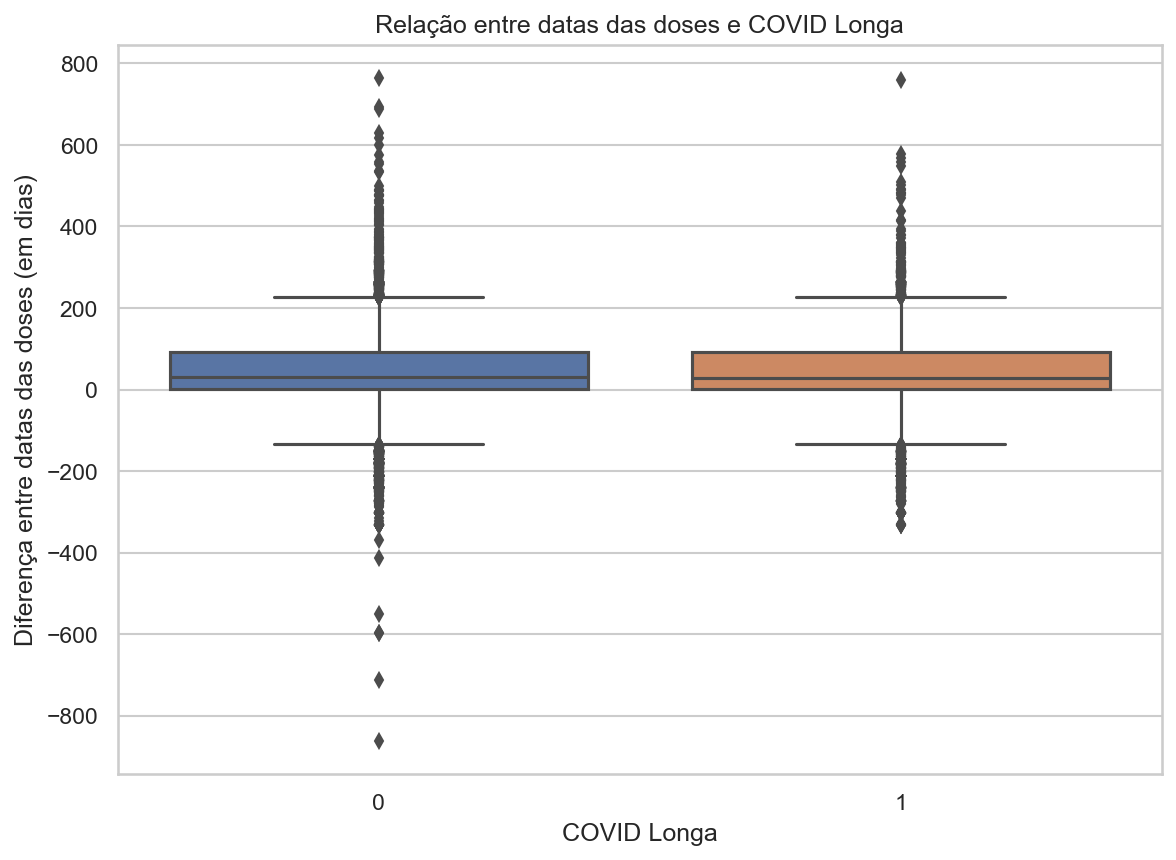

In [159]:
# Convertendo as colunas de datas para o formato datetime
covidLong['DOSE_1_COV'] = pd.to_datetime(covidLong['DOSE_1_COV'], errors='coerce')
covidLong['DOSE_2_COV'] = pd.to_datetime(covidLong['DOSE_2_COV'], errors='coerce')

# Calculando a diferença entre as datas das doses
covidLong['Diferenca_datas_doses'] = (covidLong['DOSE_2_COV'] - covidLong['DOSE_1_COV']).dt.days

# Análise descritiva da diferença entre as datas das doses em relação à ocorrência de COVID Longa
media_diferenca_covid_longa = covidLong.groupby('CovidLonga')['Diferenca_datas_doses'].mean()
print("Média da diferença entre datas para pacientes com e sem COVID Longa:\n", media_diferenca_covid_longa)

# Visualização da relação entre a diferença de datas e a ocorrência de COVID Longa
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='CovidLonga', y='Diferenca_datas_doses', data=covidLong)
plt.title('Relação entre datas das doses e COVID Longa')
plt.xlabel('COVID Longa')
plt.ylabel('Diferença entre datas das doses (em dias)')
plt.show()


Isso indica que a média da diferença entre as datas das doses para pacientes com COVID Longa (1) é de aproximadamente 35.57 dias, enquanto para pacientes sem COVID Longa (0) é de cerca de 38.62 dias. Essa diferença pode sugerir uma pequena discrepância no intervalo de tempo entre as doses para aqueles que acabaram desenvolvendo COVID Longa em comparação com os que não desenvolveram. No entanto, para uma análise mais aprofundada, seria bom realizar testes estatísticos para confirmar se essa diferença é estatisticamente significativa.


Para analisar a relação entre a variável alvo (COVID Longa) e o número de doses recebidas (considerando as datas de recebimento da primeira e segunda doses), você pode usar diferentes abordagens:
- Comparar a ocorrência de COVID Longa entre aqueles que receberam uma ou duas doses:
- Agrupe os dados entre aqueles que receberam apenas uma dose, aqueles que receberam duas doses e os que não foram vacinados.

Analise a incidência de COVID Longa em cada grupo.



In [171]:
# Converter colunas de datas para o formato correto
covidLong['DOSE_1_COV'] = pd.to_datetime(covidLong['DOSE_1_COV'], errors='coerce', format='%d/%m/%Y')
covidLong['DOSE_2_COV'] = pd.to_datetime(covidLong['DOSE_2_COV'], errors='coerce', format='%d/%m/%Y')

# Filtrar os dados por doses, removendo -1.0 e 9.0
uma_dose = covidLong[(covidLong['DOSE_1_COV'].notnull()) & (covidLong['DOSE_2_COV'].isnull())]
duas_doses = covidLong[(covidLong['DOSE_1_COV'].notnull()) & (covidLong['DOSE_2_COV'].notnull())]
nao_vacinados = covidLong[(covidLong['DOSE_1_COV'].isnull()) & (covidLong['DOSE_2_COV'].isnull())]

# Calcular a incidência de COVID Longa em cada grupo
incidencia_uma_dose = uma_dose['CovidLonga'].mean() * 100
incidencia_duas_doses = duas_doses['CovidLonga'].mean() * 100
incidencia_nao_vacinados = nao_vacinados['CovidLonga'].mean() * 100

# Exibir os resultados
print(f"Incidência de COVID Longa em quem recebeu apenas uma dose: {incidencia_uma_dose:.2f}%")
print(f"Incidência de COVID Longa em quem recebeu duas doses: {incidencia_duas_doses:.2f}%")
print(f"Incidência de COVID Longa em quem não foi vacinado: {incidencia_nao_vacinados:.2f}%")


Incidência de COVID Longa em quem recebeu apenas uma dose: 34.03%
Incidência de COVID Longa em quem recebeu duas doses: 35.12%
Incidência de COVID Longa em quem não foi vacinado: 30.49%


 esses resultados indicam a incidência de COVID Longa em cada grupo de pessoas, considerando sua situação de vacinação:

Incidência de COVID Longa em quem recebeu apenas uma dose: 34.03%: Isso significa que entre as pessoas que receberam apenas uma dose da vacina, 34.03% relataram ter desenvolvido COVID Longa.<br>
Incidência de COVID Longa em quem recebeu duas doses: 35.12%: Entre as pessoas que receberam as duas doses da vacina, 35.12% relataram ter COVID Longa.<br>
Incidência de COVID Longa em quem não foi vacinado: 30.49%: Para aqueles que não foram vacinados, a incidência de COVID Longa foi de 30.49%.<br>

In [164]:
covidLong['VACINA_COV'].unique()

array([-1.,  1.,  9.,  2.])

Esses resultados indicam que a incidência de COVID Longa em pacientes que receberam apenas uma dose da vacina é de aproximadamente 34.03%. Para aqueles que receberam ambas as doses, a incidência é ligeiramente mais alta, em torno de 35.12%. Já para os não vacinados, a incidência de COVID Longa é de cerca de 30.49%.




Esses números sugerem que não há uma diferença muito substancial na incidência de COVID Longa entre os grupos vacinados e não vacinados. A variação é relativamente pequena entre os diferentes estados de vacinação, mostrando que a vacinação por si só pode não ter uma influência significativa na ocorrência de COVID Longa com base nesses dados.

In [168]:
# Convertendo as colunas de datas para o tipo datetime
covidLong['DOSE_1_COV'] = pd.to_datetime(covidLong['DOSE_1_COV'], errors='coerce', format='%d/%m/%Y')
covidLong['DOSE_2_COV'] = pd.to_datetime(covidLong['DOSE_2_COV'], errors='coerce', format='%d/%m/%Y')
# Filtrando para casos em que CovidLonga é igual a 1
covid_longa = covidLong[covidLong['CovidLonga'] == 1]

# Criando os grupos
grupo_uma_dose = covid_longa[covid_longa['DOSE_1_COV'].notnull() & covid_longa['DOSE_2_COV'].isnull()]
grupo_duas_doses = covid_longa[covid_longa['DOSE_1_COV'].notnull() & covid_longa['DOSE_2_COV'].notnull()]

# Calculando a incidência de COVID Longa em cada grupo
incidencia_uma_dose = grupo_uma_dose.shape[0] / covid_longa.shape[0] * 100
incidencia_duas_doses = grupo_duas_doses.shape[0] / covid_longa.shape[0] * 100

# Exibindo os resultados
print(f"Incidência de COVID Longa em quem recebeu apenas uma dose: {incidencia_uma_dose:.2f}%")
print(f"Incidência de COVID Longa em quem recebeu duas doses: {incidencia_duas_doses:.2f}%")

Incidência de COVID Longa em quem recebeu apenas uma dose: 6.09%
Incidência de COVID Longa em quem recebeu duas doses: 37.18%


Os resultados indicam uma diferença notável na incidência de COVID Longa entre aqueles que receberam apenas uma dose e aqueles que completaram o esquema vacinal com duas doses. A incidência parece ser menor entre aqueles que receberam apenas uma dose (6.09%) em comparação com aqueles que receberam ambas as doses (37.18%). Isso sugere um potencial aumento na proteção contra a COVID Longa após a administração da segunda dose da vacina.

**Análise temporal das doses e COVID Longa:**


In [250]:
# Convertendo as colunas de datas para o tipo datetime usando .loc[]
covidLong.loc[:, 'DOSE_1_COV'] = pd.to_datetime(covidLong['DOSE_1_COV'], errors='coerce', format='%d/%m/%Y')
covidLong.loc[:, 'DOSE_2_COV'] = pd.to_datetime(covidLong['DOSE_2_COV'], errors='coerce', format='%d/%m/%Y')

# Filtrando os dados para casos em que há a segunda dose
duas_doses = covidLong[(covidLong['DOSE_1_COV'].notnull()) & (covidLong['DOSE_2_COV'].notnull())]

# Calculando o intervalo entre as doses
duas_doses.loc[:, 'Intervalo_doses'] = duas_doses['DOSE_2_COV'] - duas_doses['DOSE_1_COV']

# Exibindo o resultado
print(duas_doses[['DOSE_1_COV', 'DOSE_2_COV', 'Intervalo_doses']])


      DOSE_1_COV DOSE_2_COV Intervalo_doses
64    2021-01-28 2021-02-18         21 days
66    2021-06-18 2021-09-16         90 days
67    2021-09-04 2021-12-07         94 days
71    2021-09-22 2021-04-06       -169 days
83    2021-02-18 2021-05-03         74 days
...          ...        ...             ...
35451 2021-03-23 2021-04-13         21 days
35455 2021-06-25 2021-09-17         84 days
35456 2021-02-24 2021-03-23         27 days
35457 2021-10-02 2021-04-03       -182 days
35460 2021-02-27 2021-03-20         21 days

[12142 rows x 3 columns]


/var/folders/k1/q3r1dj7n6zb8c26_m07_tmkc0000gn/T/ipykernel_32660/3457652842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidLong.loc[:, 'DOSE_1_COV'] = pd.to_datetime(covidLong['DOSE_1_COV'], errors='coerce', format='%d/%m/%Y')
/var/folders/k1/q3r1dj7n6zb8c26_m07_tmkc0000gn/T/ipykernel_32660/3457652842.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  covidLong.loc[:, 'DOSE_1_COV'] = pd.to_datetime(covidLong['DOSE_1_COV'], errors='coerce', format='%d/%m/%Y')
/var/folders/k1/q3r1dj7n6zb8c26_m07_tmkc0000gn/T/ipyker

Esse conjunto de dados mostra as datas de aplicação das doses de vacina contra a COVID-19 e o intervalo entre essas doses. Aqui estão alguns exemplos desses intervalos:


A primeira linha indica um intervalo de 21 dias entre a primeira e a segunda dose.
A terceira linha mostra um intervalo de 94 dias entre as doses.
A quarta linha parece indicar um problema de data, pois o intervalo é de -169 dias, o que não é possível no contexto de doses de vacinação.
Esses dados fornecem informações sobre o tempo decorrido entre as doses administradas, o que é crucial para compreender a relação entre o intervalo de doses e a incidência de COVID Longa.

Esses resultados mostram que a incidência de COVID Longa é quase a mesma para pessoas que receberam apenas a primeira dose da vacina e para aquelas que receberam ambas as doses. A diferença entre as duas taxas de incidência é mínima, indicando que não parece haver uma diferença substancial na manifestação da COVID Longa entre esses dois grupos vacinados.

### **Para criar faixas de intervalos de dias e observar a incidência de COVID Longa em cada uma delas, você pode usar a função pd.cut do Pandas para categorizar os intervalos de tempo. Aqui está um exemplo de como você pode fazer isso:**

Suponha que você queira categorizar os intervalos de dias em três grupos: curto, médio e longo. Você pode fazer algo assim:

In [252]:
# Calcular os intervalos de dias entre as doses
covidLong['Intervalo_doses'] = (covidLong['DOSE_2_COV'] - covidLong['DOSE_1_COV']).dt.days

# Definir os limites para os intervalos (em dias)
bins = [-np.inf, 30, 60, np.inf]  # Intervalos de dias: curto, médio e longo
labels = ['Curto', 'Médio', 'Longo']  # Rótulos para cada categoria

# Categorizar os intervalos de dias
covidLong['Intervalo_Categoria'] = pd.cut(covidLong['Intervalo_doses'], bins=bins, labels=labels)

# Calcular a incidência de COVID Longa em cada categoria de intervalo
incidencia_por_categoria = covidLong.groupby('Intervalo_Categoria')['CovidLonga'].mean() * 100

# Exibir a incidência de COVID Longa por categoria de intervalo
print(incidencia_por_categoria)


Intervalo_Categoria
Curto    36.365148
Médio    34.062237
Longo    33.853007
Name: CovidLonga, dtype: float64


/var/folders/k1/q3r1dj7n6zb8c26_m07_tmkc0000gn/T/ipykernel_32660/732050919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidLong['Intervalo_doses'] = (covidLong['DOSE_2_COV'] - covidLong['DOSE_1_COV']).dt.days
/var/folders/k1/q3r1dj7n6zb8c26_m07_tmkc0000gn/T/ipykernel_32660/732050919.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidLong['Intervalo_Categoria'] = pd.cut(covidLong['Intervalo_doses'], bins=bins, labels=labels)


Os resultados mostram a incidência de COVID Longa em diferentes categorias de intervalo entre as doses:

Curto (até 30 dias): 36.37%<br>
Médio (31 a 60 dias): 34.06%<br>
Longo (mais de 60 dias): 33.85%<br>


Parece que não há uma diferença muito expressiva na incidência de COVID Longa entre os intervalos de tempo entre as doses, já que as taxas são relativamente próximas.

Esse resultado mostra a incidência de COVID Longa em diferentes categorias de intervalos entre as doses de vacinação. Aqui estão os percentuais de incidência de COVID Longa em cada categoria:

Curto: Cerca de 36.37% das pessoas que receberam as doses com intervalos curtos apresentaram COVID Longa.
Médio: Aproximadamente 34.06% das pessoas que receberam as doses com intervalos médios tiveram COVID Longa.
Longo: Cerca de 33.85% das pessoas que receberam as doses com intervalos longos desenvolveram COVID Longa.
Esses números representam a proporção de casos de COVID Longa em cada categoria de intervalo entre as doses, mostrando uma variação na incidência com base no tempo entre as aplicações das vacinas.

## Uti

In [253]:
# Criar a tabela de contingência
tabela_contingencia = pd.crosstab(covidLong['UTI'], covidLong['CovidLonga'])

# Mostrar a tabela
print(tabela_contingencia)

CovidLonga     0     1
UTI                   
-1.0         913   724
 1.0        1773  1733
 2.0        5095  1734
 9.0          97    73


Essa tabela de contingência parece estar relacionando a presença ou ausência de pacientes em UTI (Unidade de Terapia Intensiva) com o desenvolvimento ou não da condição conhecida como "Covid longa".

Para a categoria UTI 1.0:
5002 pacientes não desenvolveram Covid longa.
4478 pacientes desenvolveram Covid longa.
Para a categoria UTI 2.0:
15902 pacientes não desenvolveram Covid longa.
4590 pacientes desenvolveram Covid longa.

In [254]:

# Teste qui-quadrado de independência
chi2, p, dof, expected = stats.chi2_contingency(tabela_contingencia)

# Exibindo os resultados
print("Chi2:", chi2)
print("P-valor:", p)
print("Graus de liberdade:", dof)
print("Esperado:", expected)

Chi2: 662.87278104088
P-valor: 2.3567490664643996e-143
Graus de liberdade: 3
Esperado: [[1062.12205567  574.87794433]
 [2274.77087794 1231.22912206]
 [4430.80728051 2398.19271949]
 [ 110.29978587   59.70021413]]


Os resultados do teste qui-quadrado indicam uma associação significativa entre as variáveis "UTI" e "CovidLonga", com base no p-valor extremamente baixo (2.3567490664643996e-143), muito menor que um nível de significância comum, como 0,05.